## Steps Followed For Building The Required Model
- **1. Importing Data**
- **2. Data Inspection**
- **3. Data Cleaning**
- **4. Exploratory Data Analysis**
    -  Univariate Analysis (Categorical Variables)
    -  Bivariate Analysis (Categorical Variables)
    -  Bivariate Analysis (Categorical Vs Continous Variables)
    -  Numerical Variable Analysis
    -  Outlier Detection and Treatment
- **5. Creating Dummy Variables for the Categorical Variables**
- **6. Model Building Using Logistic Regression**
    - Splitting The Dataset
    - Feature Scaling 
    - Model Building Using RFE and Statsmodels
    - Deriving Probabilities and Lead Score
    - Confusion Matrix
    - Plotting the ROC Curve
    - Optimal Cutoff
- **7. Predictions On Test Dataset**
    - Feature Scaling
    - Prediction on Test Data
    - Confusion Matrix
-  **8. Assigning Lead Score with respect to Lead_Num_ID**
-  **9. Finding out the Hot Leads which should be contacted**
-  **10. Conclusions**
  


### 1. Importing Data

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset
lead_data = pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', None)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 2. Data Inspection

In [3]:
#checking the shape of data
lead_data.shape

(9240, 37)

In [4]:
# Checking the descriptive information about dataset
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Checking all the columns of dataset
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
# Checking the statistical aspects of the dataset
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Checking for duplicate data
lead_data[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


### 3. Data Cleaning

In [8]:
# Replacing Select with NA values and consider it as null value
lead_data = lead_data.replace('Select', np.nan)

In [9]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
# Checking Duplicate Values in column 'Prospect ID'
sum(lead_data.duplicated(subset = 'Prospect ID')) == 0

True

In [11]:
# Checking Duplicate Values in column 'Lead Number'
sum(lead_data.duplicated(subset = 'Lead Number')) == 0

True

In [12]:
# Dropping'Prospect ID' and 'Lead Number' columns as they have all unique values
lead_data.drop(columns=['Prospect ID','Lead Number'],axis=1,inplace=True)

In [13]:
# Checking the percentage of null values in each column
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

In [14]:
# Dropping columns having more than 40% missing value columns
null_percentage = (lead_data.isnull().sum() / len(lead_data.index)) * 100
columns_with_high_nulls = null_percentage[null_percentage > 40].index.tolist()

print(columns_with_high_nulls)

['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [15]:
# Dropping the columns with missing values greater than 40%.
lead_data.drop(columns=['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],axis=1,inplace=True)

In [16]:
# Checking missing values percentage in remaining columns after dropping some missing value columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement       

##### 3.1. Analysing the City Column

In [17]:
# Checking value_counts of City including null values
lead_data['City'].value_counts(dropna = False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

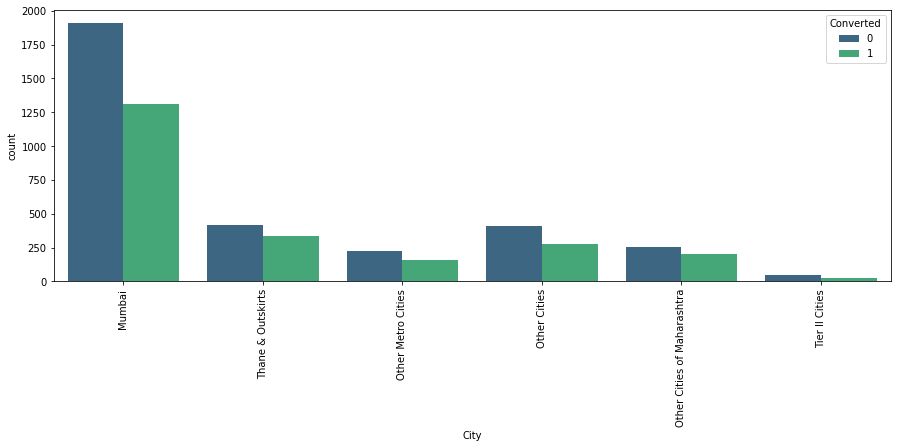

In [18]:
# Visualising the spread of data in 'City' column
plt.figure(figsize=(15,5))
plt1=sns.countplot(x='City', hue='Converted', data=lead_data, palette = 'viridis')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

In [19]:
# Imputing the null values with most common city from data i.e. Mumbai
lead_data['City'].replace(np.nan, 'Mumbai',inplace=True)

In [20]:
# Checking the value_counts after Imputation
lead_data['City'].value_counts(dropna = False)

City
Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

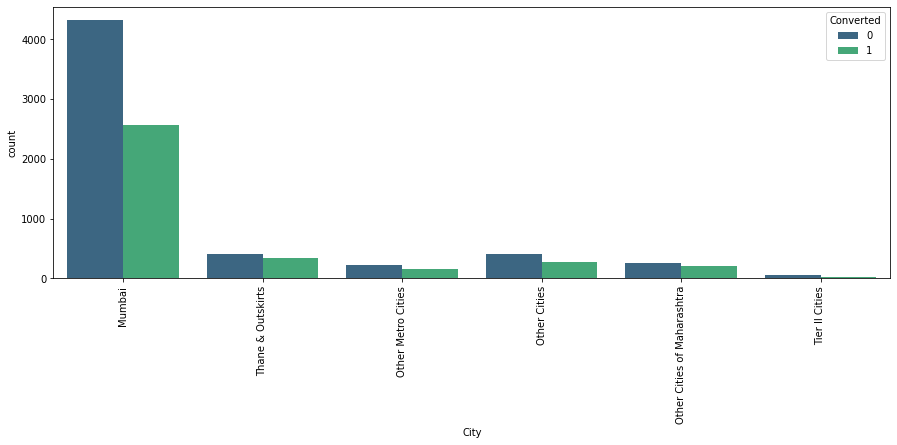

In [21]:
# Visualising the data after data imputation
plt.figure(figsize=(15,5))
plt1=sns.countplot(x='City', hue='Converted', data=lead_data, palette = 'viridis')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

##### 3.2 Analysing the Specialization Column

In [22]:
# Checking value_counts of Specialization including null values
lead_data['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

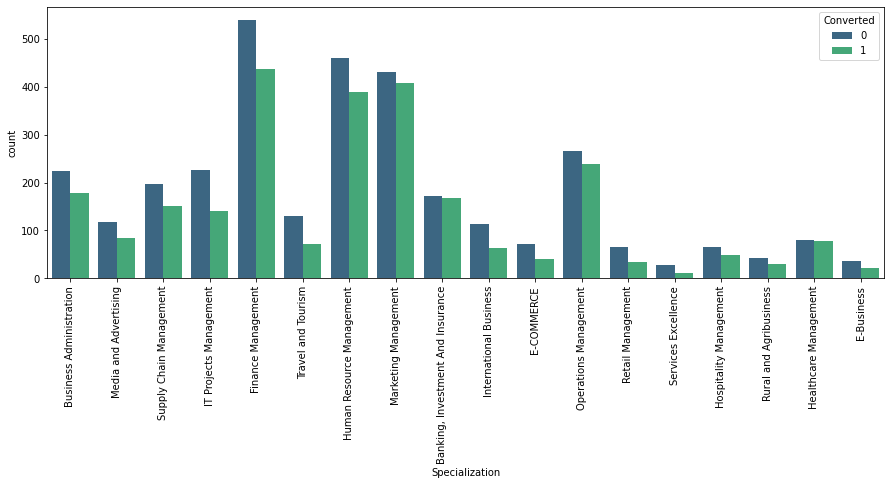

In [23]:
# Visualising the spread of data in 'Specialization' column
plt.figure(figsize=(15,5))
plt1=sns.countplot(x='Specialization', hue='Converted', data=lead_data, palette = 'viridis')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

In [24]:
# Imputing the null values in Specialization with Others 
lead_data['Specialization'].replace(np.NaN,"Others",inplace=True)

In [25]:
# Combining different management branches under Management Specializations
lead_data['Specialization'] = lead_data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

In [26]:
# Checking the value_counts after Imputation and combining different specializations into Management Specializations
lead_data['Specialization'].value_counts(dropna=False)

Specialization
Management_Specializations           4253
Others                               3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

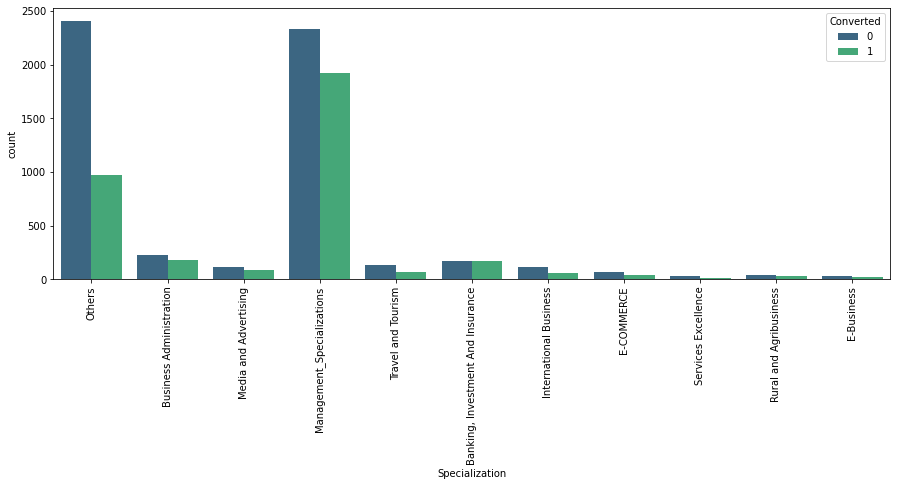

In [27]:
# Visualising the spread of data in 'specialization' column after combining various specializations into Management Specialization
plt.figure(figsize=(15,5))
plt1=sns.countplot(x='Specialization', hue='Converted', data=lead_data, palette = 'viridis')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

##### 3.3 Analysing the Tags Column

In [28]:
# Checking the value_counts of the Tags column including the null values
lead_data['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

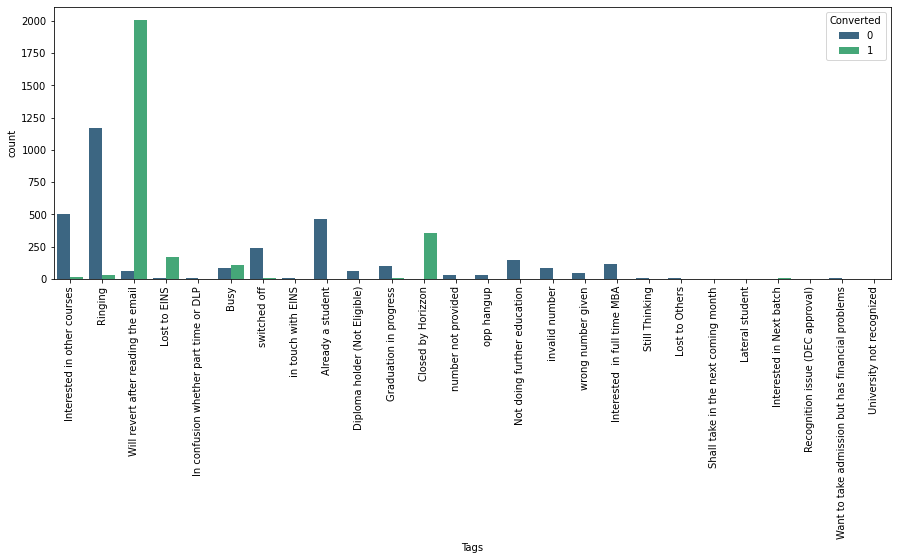

In [29]:
# Visualising the spread of data in 'Specialization' column
plt.figure(figsize=(15,5))
plt1=sns.countplot(x='Tags', hue='Converted', data=lead_data, palette = 'viridis')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

In [30]:
# Imputing the null values in Specialization with Not Specified
lead_data['Tags'].replace(np.NaN,'Not Specified',inplace=True)

In [31]:
# Replacing the 'Tags' column low frequency data with'Other_Tags'
lead_data['Tags'] = lead_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education','invalid number',
                                    'wrong number given','Interested  in full time MBA'], 'Other_Tags')

In [32]:
# Checking the value_counts of the Tags column after Imputation and combining various tags into Other_Tags
lead_data['Tags'].value_counts(dropna=False)

Tags
Not Specified                          3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: count, dtype: int64

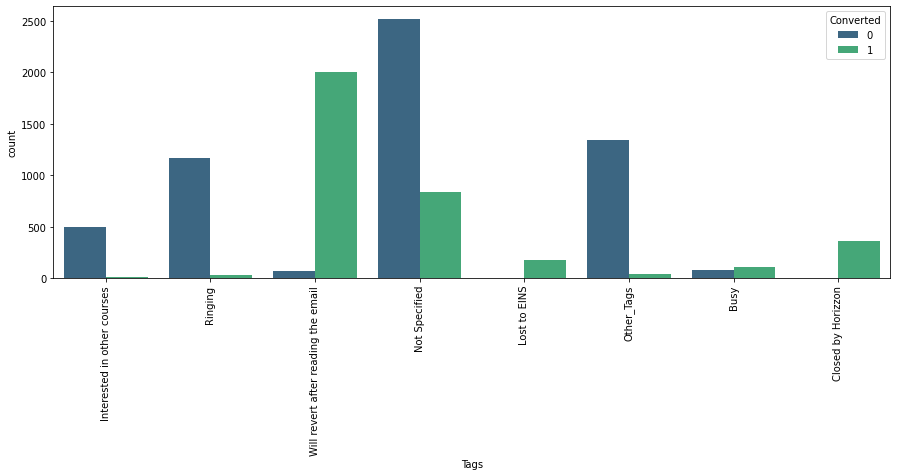

In [33]:
# Visualising the spread of data in 'Tags' column after combining various Tags into Other_Tags
plt.figure(figsize=(15,5))
plt1=sns.countplot(x='Tags', hue='Converted', data=lead_data, palette = 'viridis')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

##### 3.4 Analysing the What is your current occupation Column

In [34]:
# Checking the value_counts of the What is your current occupation column including the null values
lead_data['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

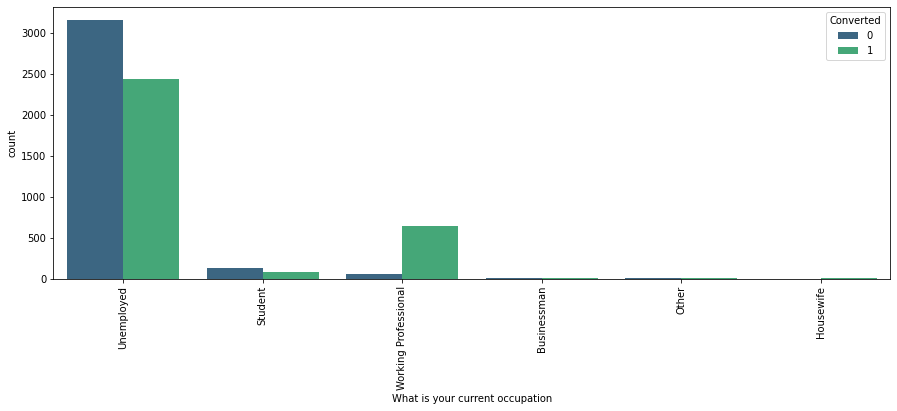

In [35]:
# Visualising the spread of data in 'What is your current occupation' column
plt.figure(figsize=(15,5))
plt1=sns.countplot(x='What is your current occupation', hue='Converted', data=lead_data, palette = 'viridis')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

In [36]:
# Imputing the null values in this column with 'Unemployed'
lead_data['What is your current occupation'].replace(np.NaN,"Unemployed",inplace=True)

In [37]:
# Checking the value_counts of this column after Imputation
lead_data['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

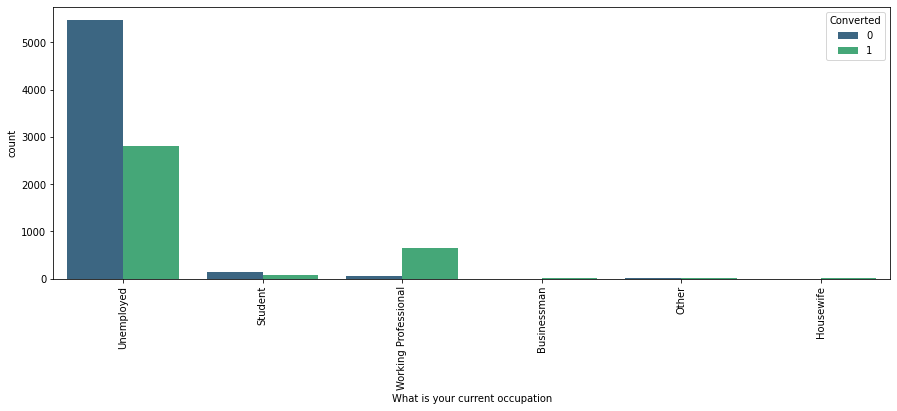

In [38]:
# Visualising the spread of data in 'What is your current occupation' column after Imputation
plt.figure(figsize=(15,5))
plt1=sns.countplot(x='What is your current occupation', hue='Converted', data=lead_data, palette = 'viridis')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

##### 3.5 Analysing the What matters most to you in choosing a course Column

In [39]:
# Checking the value_counts of 'What matters most to you in choosing a course' column
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

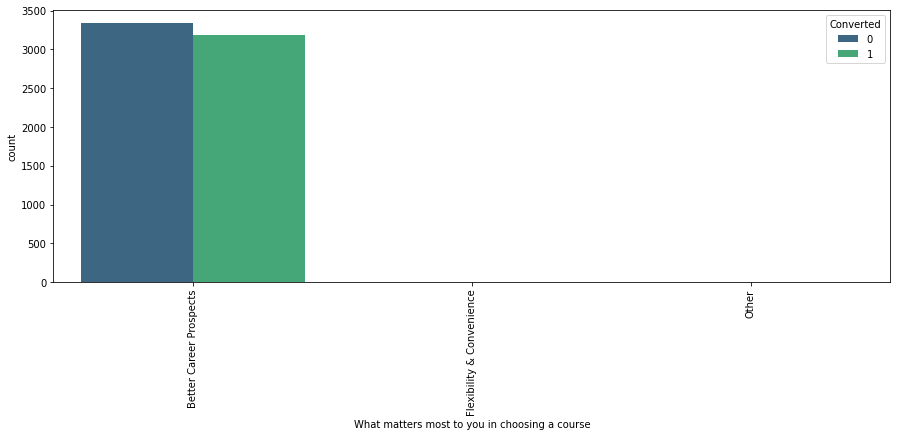

In [40]:
# Visualising the spread of data in 'What matters most to you in choosing a course' column 
plt.figure(figsize=(15,5))
plt1=sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=lead_data, palette = 'viridis')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

In [41]:
# Imputing the null values of this column with Better Career Prospects
lead_data['What matters most to you in choosing a course'].replace(np.NaN,'Better Career Prospects',inplace=True)

In [42]:
# Checking the value_counts of 'What matters most to you in choosing a course' column after imputation
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

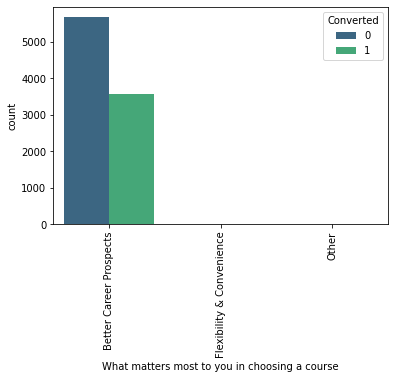

In [43]:
# Visualising the spread of data in 'What matters most to you in choosing a course' column after imputation
plt1=sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=lead_data, palette = 'viridis')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

##### 3.6 Analysing the Country Column

In [44]:
# Checking the value_counts of 'Country' column including null values
lead_data['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

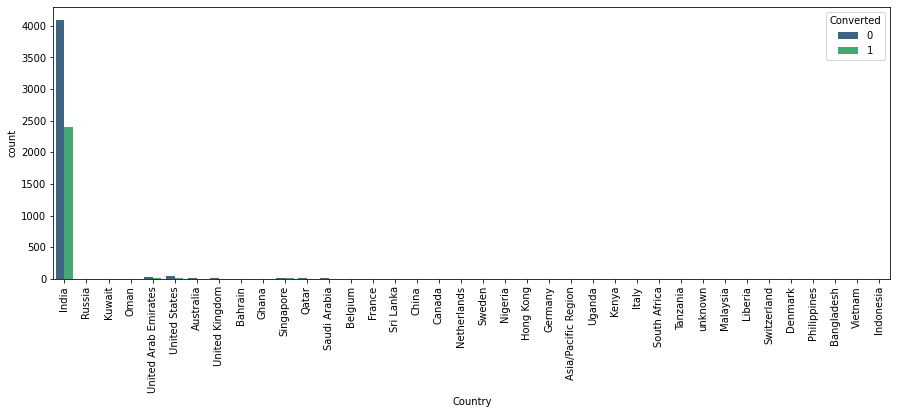

In [45]:
# Visualising the spread of data in 'Country' column
plt.figure(figsize=(15,5))
plt1=sns.countplot(x='Country', hue='Converted', data=lead_data, palette = 'viridis')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

In [46]:
# Imputing the null values of this column with India
lead_data['Country'].replace(np.NaN,"India",inplace=True)

In [47]:
# Checking the value_counts of this column after imputation
lead_data['Country'].value_counts(dropna=False)

Country
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

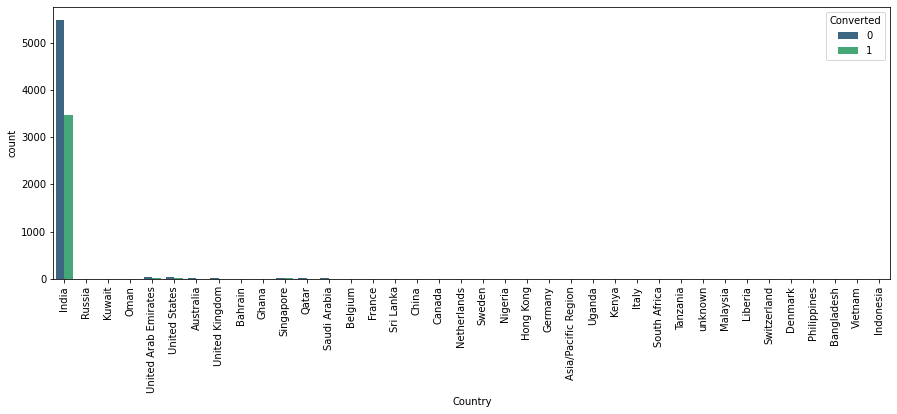

In [48]:
# Visualising the spread of data in 'Country' column after imputation
plt.figure(figsize=(15,5))
plt1=sns.countplot(x='Country', hue='Converted', data=lead_data, palette = 'viridis')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

#### 3.7 Analysing the Lead Source Column

In [49]:
# Checking the value_counts of 'Lead Source' column including null values
lead_data['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

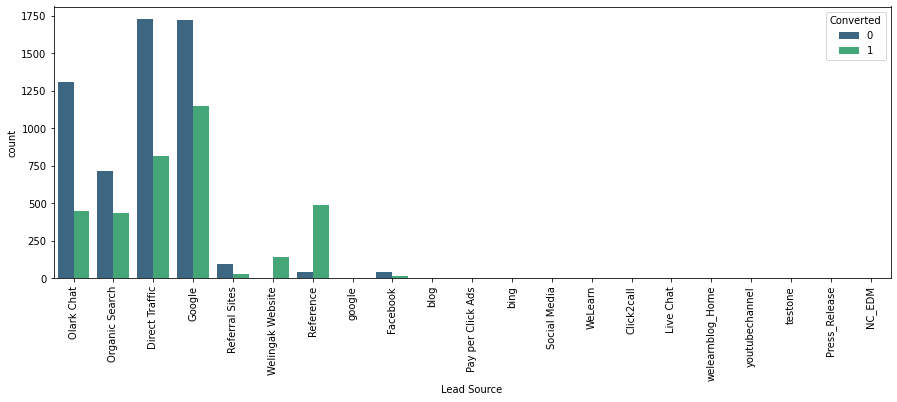

In [50]:
# Visualising the spread of data in 'Lead Source' column after imputation
plt.figure(figsize=(15,5))
plt1=sns.countplot(x='Lead Source', hue='Converted', data=lead_data, palette = 'viridis')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

In [51]:
# Combining low frequency data points of 'Lead Source' column into 'Others'
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Sources')

lead_data['Lead Source'] = lead_data['Lead Source'].replace("google", 'Google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Facebook'], 'Social Media')
lead_data['Lead Source'] = lead_data['Lead Source'].replace(np.NaN, 'Others')

In [52]:
# Checking the value_counts in 'Lead Source' column after imputation
lead_data['Lead Source'].value_counts(dropna=False)

Lead Source
Google                2873
Direct Traffic        2543
Olark Chat            1755
Organic Search        1154
Reference              534
Welingak Website       142
Referral Sites         125
Social Media            55
Others                  36
Other_Lead_Sources      23
Name: count, dtype: int64

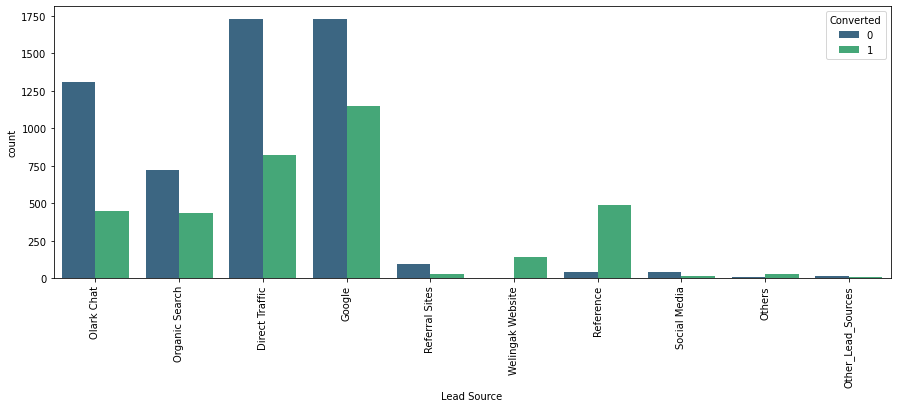

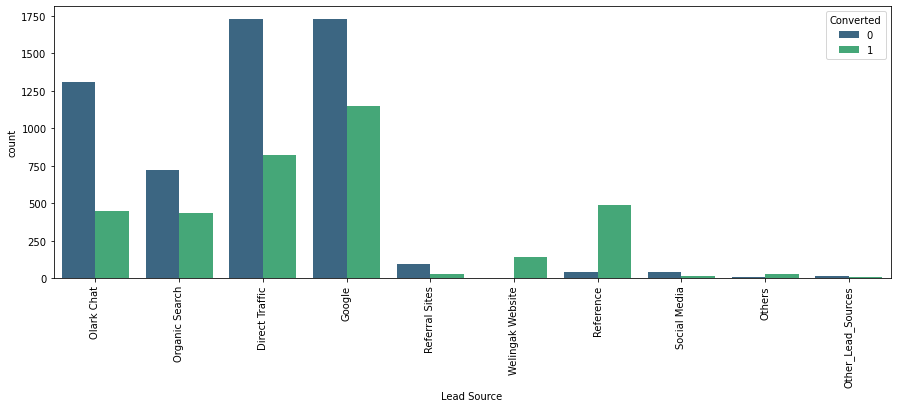

In [53]:
# Visualising the spread of data in 'Lead Source' column after data imputation and combining low frequency datapoints into Others
plt.figure(figsize=(15,5))
plt1=sns.countplot(x='Lead Source', hue='Converted', data=lead_data, palette = 'viridis')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()
plt.figure(figsize=(15,5))
plt1=sns.countplot(x='Lead Source', hue='Converted', data=lead_data, palette = 'viridis')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

#### 3.8 Analysing the Last Activity column

In [54]:
# Checking the value_counts in 'Last Activity' column
lead_data['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

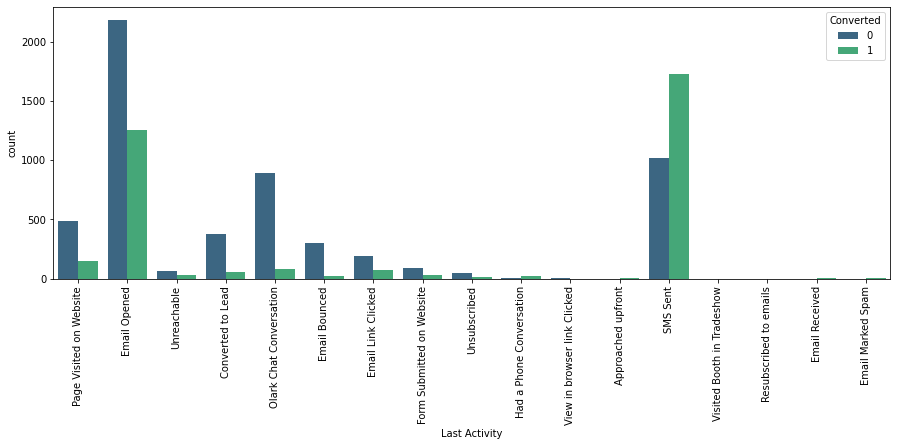

In [55]:
# Visualising the spread of data in 'Last Activity' column after imputation and combining 
plt.figure(figsize=(15,5))
plt1=sns.countplot(x='Last Activity', hue='Converted', data=lead_data, palette = 'viridis')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

In [56]:
# Combining low frequency data points into 'Others_Tags'
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Unreachable',
                                      'Unsubscribed',
                                       'Had a Phone Conversation',
                                       'Approached upfront',
                                       'View in browser link Clicked',
                                       'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 
                                                             'Resubscribed to emails'] , 'Other_Tags')
lead_data['Last Activity'] = lead_data['Last Activity'].replace(np.NaN, 'Other_Tags')

In [57]:
# Checking the value_counts in 'Last Activity' column after imputation
lead_data['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Other_Tags                    308
Email Link Clicked            267
Form Submitted on Website     116
Name: count, dtype: int64

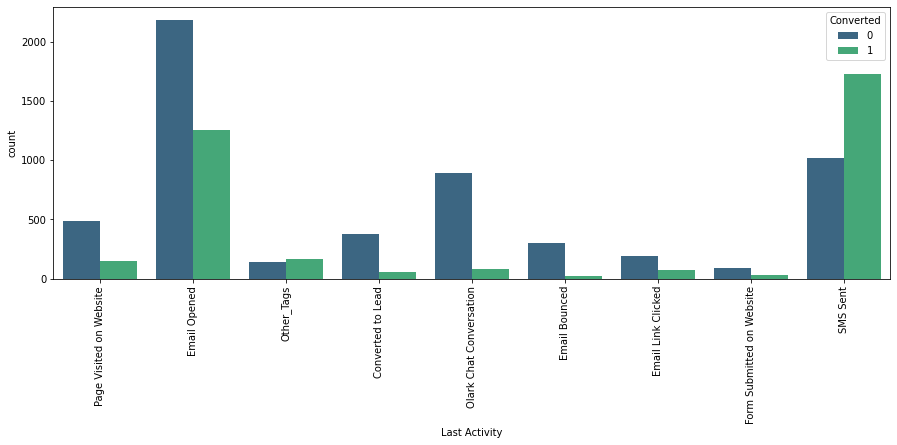

In [58]:
# Visualising the spread of data in 'Last Activity' column after imputation and combing lower frequency datapoints into Other_Tags
plt.figure(figsize=(15,5))
plt1=sns.countplot(x='Last Activity', hue='Converted', data=lead_data, palette = 'viridis')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

#### 3.9 Analysing the Last Notable Activity

In [59]:
# Checking the value_counts of 'Last Notable Activity' column 
lead_data['Last Notable Activity'].value_counts(dropna = False)

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

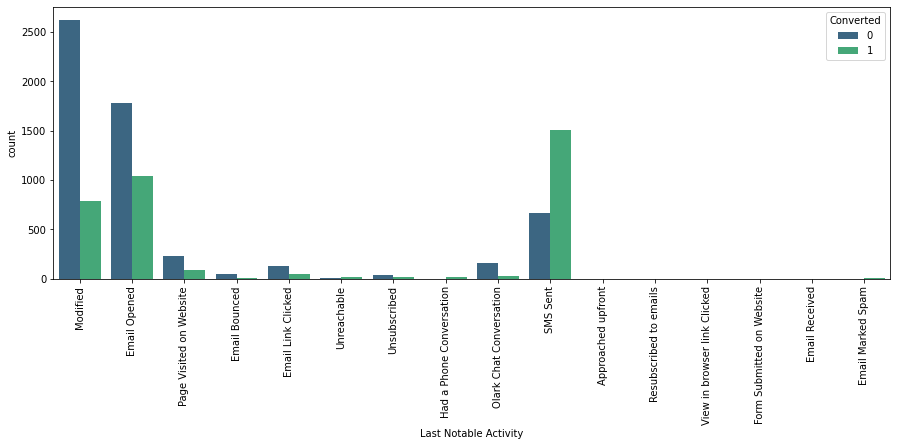

In [60]:
# Visualising the spread of data in 'Last Notable Activity' column 
plt.figure(figsize=(15,5))
plt1=sns.countplot(x='Last Notable Activity', hue='Converted', data=lead_data, palette = 'viridis')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

In [61]:
# Combining low frequency data points of 'Last Notable Activity' into 'Others'
lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].replace(['Email Bounced',
                                      'Unsubscribed',
                                       'Unreachable',
                                       'Had a Phone Conversation',
                                       'Email Marked Spam',
                                       'Approached upfront', 'Resubscribed to emails','View in browser link Clicked', 'View in browser link Clicked',
                                       'Form Submitted on Website', 'Email Received'] , 'Others')

In [62]:
# Checking the value_counts in 'Last Notable Activity' column after Imputation
lead_data['Last Notable Activity'].value_counts(dropna=False)

Last Notable Activity
Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: count, dtype: int64

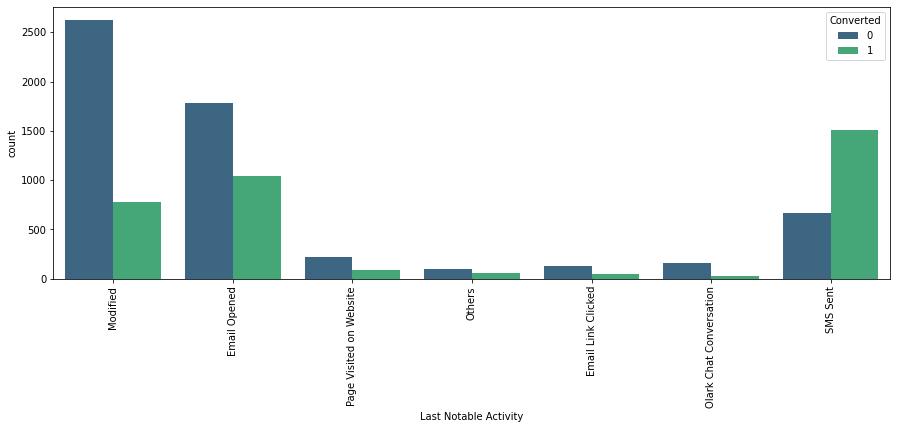

In [63]:
# Visualising the spread of data in 'Last Notable Activity' column after Imputation
plt.figure(figsize=(15,5))
plt1=sns.countplot(x='Last Notable Activity', hue='Converted', data=lead_data, palette = 'viridis')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

In [64]:
# Checking the Percentage of null values in all columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      1.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             1.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [65]:
# Removing the rows/columns which still contain missing values 
lead_data = lead_data.dropna()

In [66]:
# Rechecking the null values percentage in all the columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [67]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   object 
 3   Do Not Call                                    9103 non-null   object 
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 non-n

In [68]:
# Categorical columns
categorical_columns = lead_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Numerical columns
numerical_columns = lead_data.select_dtypes(include=['number']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']
Numerical Columns: ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


##### 3.10 Checking for categorical columns having binary values for data imbalance.

In [69]:
# Checking the counts for "Do Not Call" column
lead_data["Do Not Call"].value_counts()
# Most of the values are No, hence dropping the column as it would not contribute to analysis

Do Not Call
No     9101
Yes       2
Name: count, dtype: int64

In [70]:
# Checking the counts for "Do Not Email" column
lead_data["Do Not Email"].value_counts()

Do Not Email
No     8379
Yes     724
Name: count, dtype: int64

In [71]:
# Checking the counts for "Search" column
lead_data["Search"].value_counts()
# Most of the values are No, hence dropping the column as it would not contribute to analysis

Search
No     9089
Yes      14
Name: count, dtype: int64

In [72]:
# Checking the counts for "Magazine" column
lead_data["Magazine"].value_counts()
# All the values are No, hence dropping the column as it would not contribute to analysis

Magazine
No    9103
Name: count, dtype: int64

In [73]:
# Checking the counts for "Newspaper Article" column
lead_data["Newspaper Article"].value_counts()
# Most of the values are No, hence dropping the column as it would not contribute to analysis

Newspaper Article
No     9101
Yes       2
Name: count, dtype: int64

In [74]:
# Checking the counts for "Receive More Updates About Our Courses" column
lead_data["Receive More Updates About Our Courses"].value_counts()
# All the values are No, hence dropping the column as it would not contribute to analysis

Receive More Updates About Our Courses
No    9103
Name: count, dtype: int64

In [75]:
# Checking the counts for "X Education Forums" column
lead_data["X Education Forums"].value_counts()
# Most of the values are No, hence dropping the column as it would not contribute to analysis

X Education Forums
No     9102
Yes       1
Name: count, dtype: int64

In [76]:
# Checking the counts for "Newspaper" column
lead_data["Newspaper"].value_counts()
# Most of the values are No, hence dropping the column as it would not contribute to analysis

Newspaper
No     9102
Yes       1
Name: count, dtype: int64

In [77]:
# Checking the counts for "Digital Advertisement" column
lead_data["Digital Advertisement"].value_counts()
# Most of the values are No, hence dropping the column as it would not contribute to analysis

Digital Advertisement
No     9099
Yes       4
Name: count, dtype: int64

In [78]:
# Checking the counts for "Through Recommendations" column
lead_data["Through Recommendations"].value_counts()
# Most of the values are No, hence dropping the column as it would not contribute to analysis

Through Recommendations
No     9096
Yes       7
Name: count, dtype: int64

In [79]:
# Checking the counts for "Receive More Updates About Our Courses" column
lead_data["Receive More Updates About Our Courses"].value_counts()
# All the values are No, hence dropping the column as it would not contribute to analysis

Receive More Updates About Our Courses
No    9103
Name: count, dtype: int64

In [80]:
# Checking the counts for "Update me on Supply Chain Content" column
lead_data["Update me on Supply Chain Content"].value_counts()
# All the values are No, hence dropping the column as it would not contribute to analysis

Update me on Supply Chain Content
No    9103
Name: count, dtype: int64

In [81]:
# Checking the counts for "Get updates on DM Content" column
lead_data["Get updates on DM Content"].value_counts()
# All the values are No, hence dropping the column as it would not contribute to analysis

Get updates on DM Content
No    9103
Name: count, dtype: int64

In [82]:
# Checking the counts for "I agree to pay the amount through cheque" column
lead_data["I agree to pay the amount through cheque"].value_counts()
# All the values are No, hence dropping the column as it would not contribute to analysis

I agree to pay the amount through cheque
No    9103
Name: count, dtype: int64

In [83]:
# Checking the counts for "Country" column
lead_data['Country'].value_counts()

Country
India                   8816
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [84]:
# More than 95 % values of country are India, hence dropping the column as it would not contribute to analysis
100*(lead_data['Country'].value_counts())/len(lead_data['Country'])

Country
India                   96.847193
United States            0.757992
United Arab Emirates     0.582226
Singapore                0.263649
Saudi Arabia             0.230693
United Kingdom           0.164781
Australia                0.142810
Qatar                    0.109854
Hong Kong                0.076898
Bahrain                  0.076898
Oman                     0.065912
France                   0.065912
unknown                  0.054927
South Africa             0.043942
Nigeria                  0.043942
Germany                  0.043942
Kuwait                   0.043942
Canada                   0.043942
Sweden                   0.032956
China                    0.021971
Asia/Pacific Region      0.021971
Uganda                   0.021971
Bangladesh               0.021971
Italy                    0.021971
Belgium                  0.021971
Netherlands              0.021971
Ghana                    0.021971
Philippines              0.021971
Russia                   0.010985
Switze

In [85]:
# Checking the counts for "What matters most to you in choosing a course" column
lead_data['What matters most to you in choosing a course'].value_counts()
# All the values are almost Better Career Prospects, hence dropping the column as it would not contribute to analysis

What matters most to you in choosing a course
Better Career Prospects      9101
Flexibility & Convenience       1
Other                           1
Name: count, dtype: int64

##### 3.11 Dropping all these above columns which has data imbalance

In [86]:
lead_data.drop(columns=['I agree to pay the amount through cheque', 'Get updates on DM Content','Update me on Supply Chain Content'
                 ,'Receive More Updates About Our Courses','Through Recommendations',
                 'Digital Advertisement','Newspaper','X Education Forums',
                 'Receive More Updates About Our Courses','Newspaper Article',
                 'Magazine','Search','Do Not Call','What matters most to you in choosing a course','Country'], axis = 1, inplace = True)

In [87]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   object 
 

In [88]:
lead_data.shape

(9103, 14)

### 4. Exploratory Data Analysis

In [89]:
# Categorical columns
categorical_columns = lead_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Numerical columns
numerical_columns = (lead_data.select_dtypes(include=['number']).columns.tolist())
numerical_columns.remove('Converted') # Since Converted is the target variable 

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']
Numerical Columns: ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


##### 4.1 Univariate Analysis (Categorical Variables)

Lead Origin


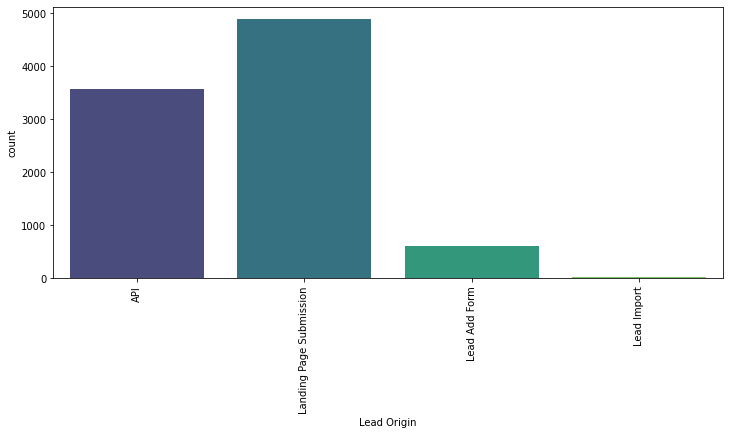

Lead Source


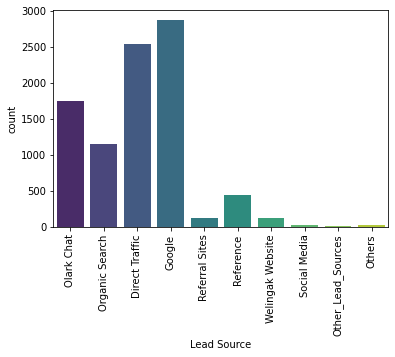

Do Not Email


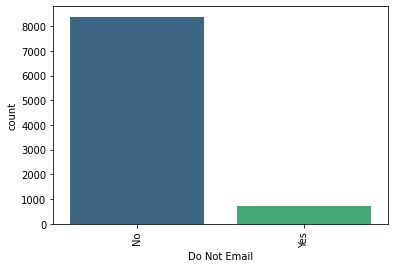

Last Activity


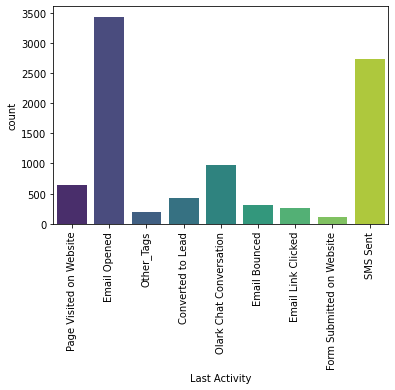

Specialization


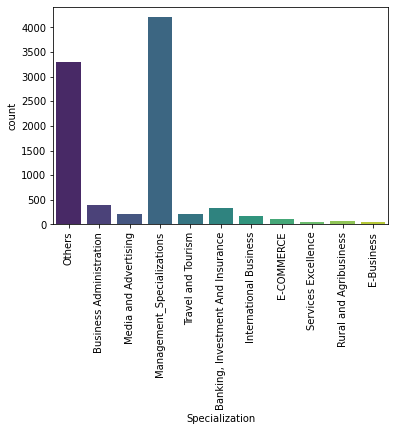

What is your current occupation


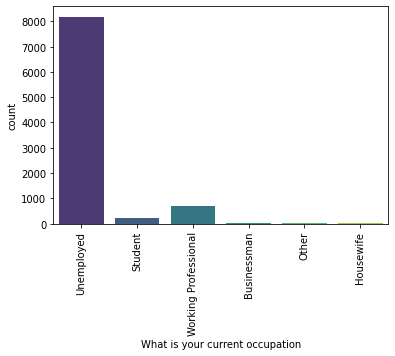

Tags


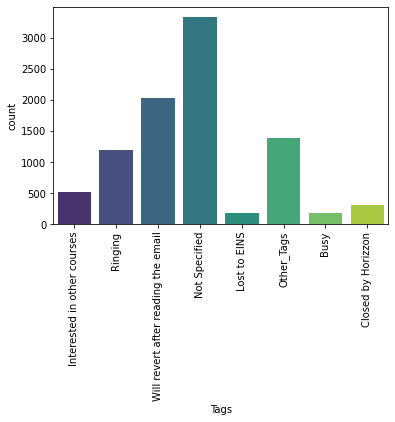

City


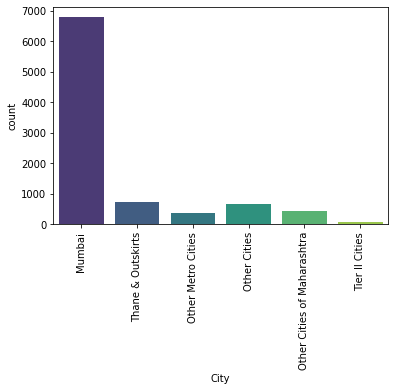

A free copy of Mastering The Interview


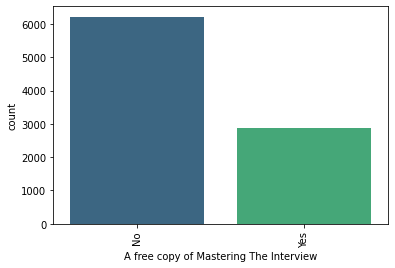

Last Notable Activity


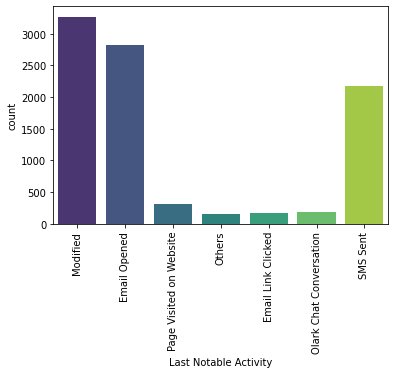

In [90]:
plt.figure(figsize=(12,5))
for i in categorical_columns:
    print(i)
    sns.countplot(data=lead_data,x=i,palette='viridis')
    plt.xticks(rotation = 90)
    plt.show()

Observations:
- Google has the highest number of leads as the source, which is logical since most people primarily use Google as their search engine.
- The majority of leads were generated through "Landing Page Submission" and "API" origins.
- Most customers are categorized as unemployed.
- A large number of customers have their specialization listed as "Others" or "Management Specialization."
- Majority of the customers are from Mumbai city. 







##### 4.2 Bivariate Analysis(Categorical)

<Figure size 864x360 with 0 Axes>

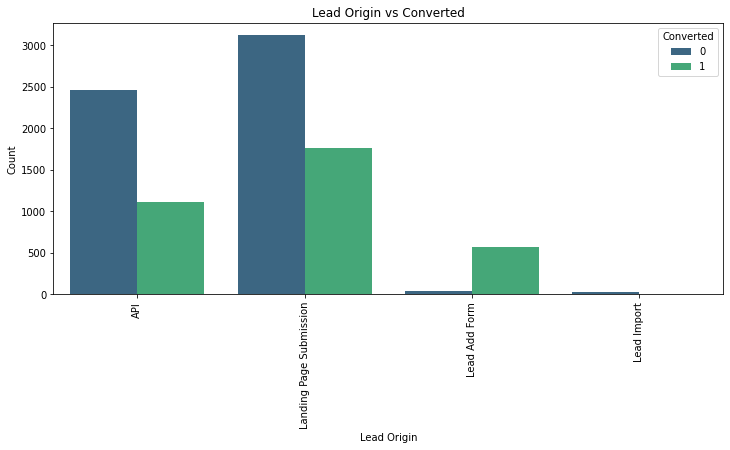

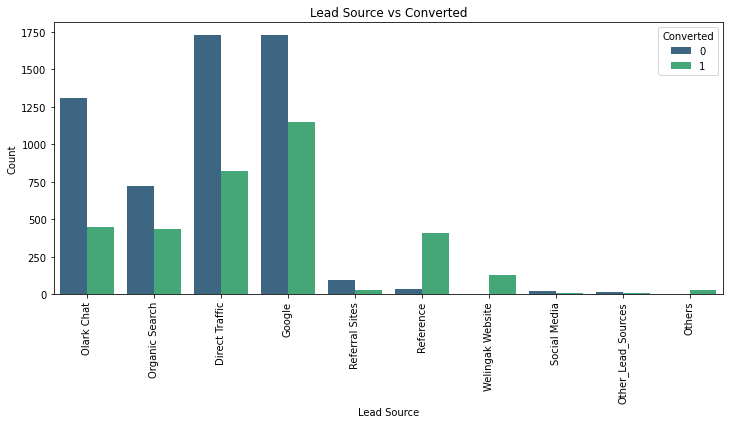

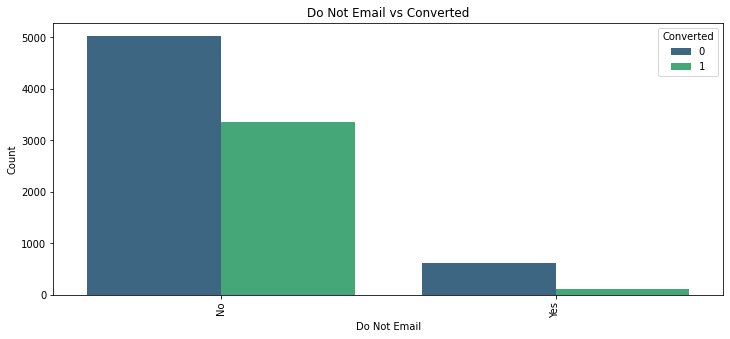

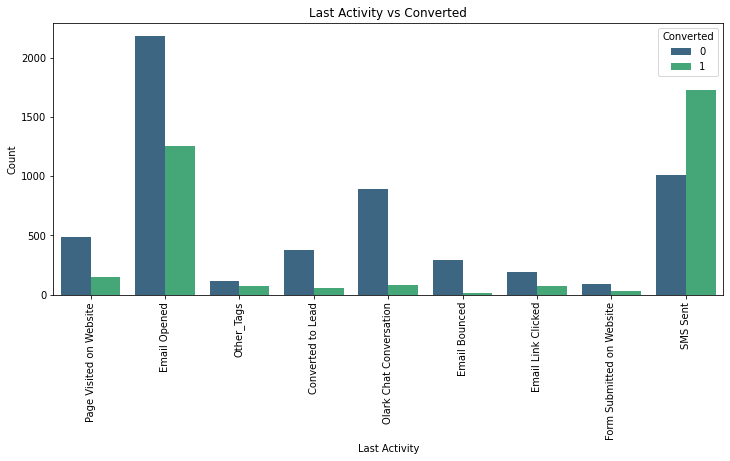

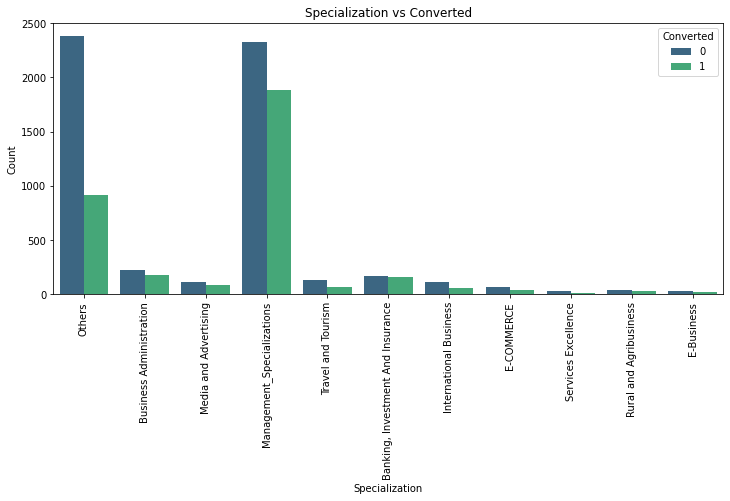

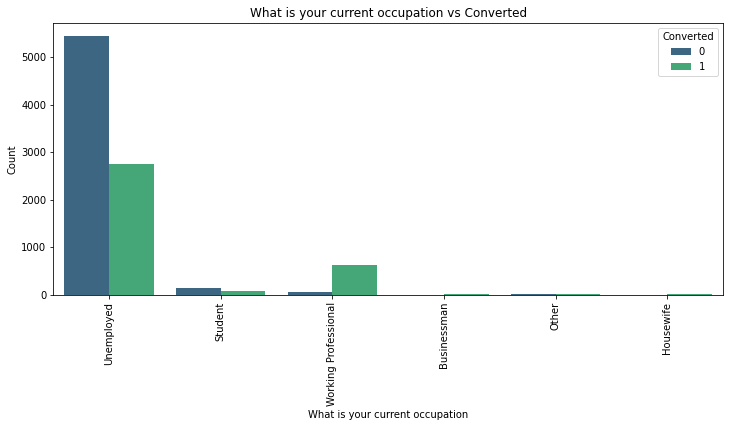

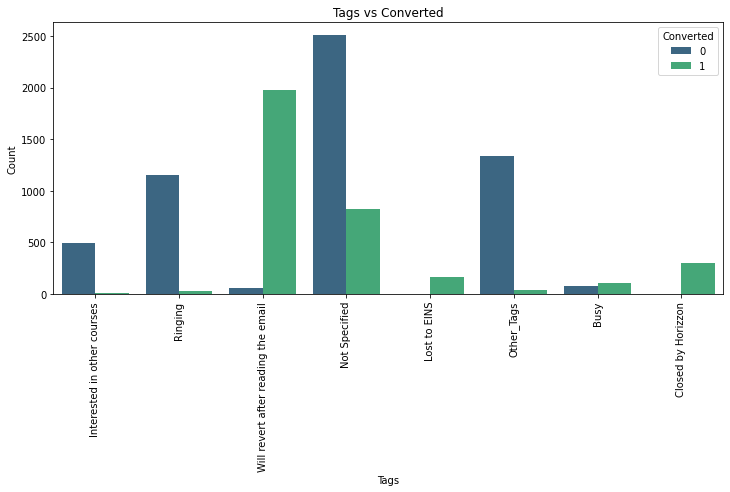

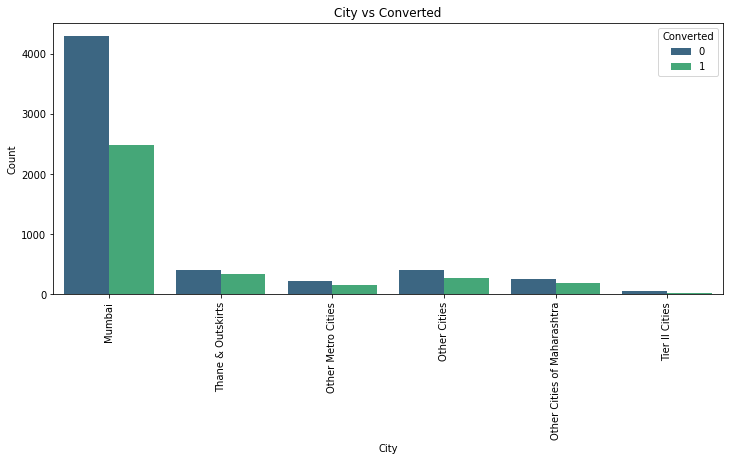

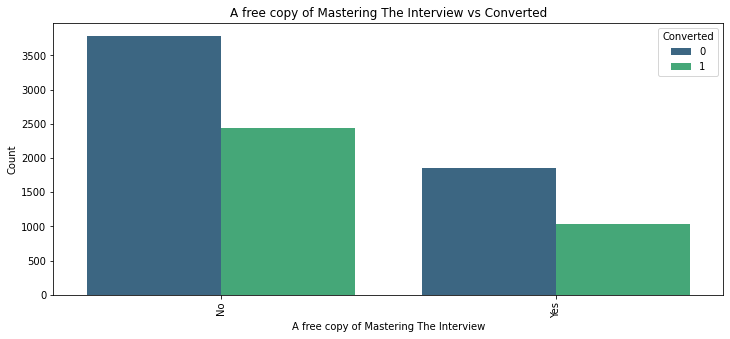

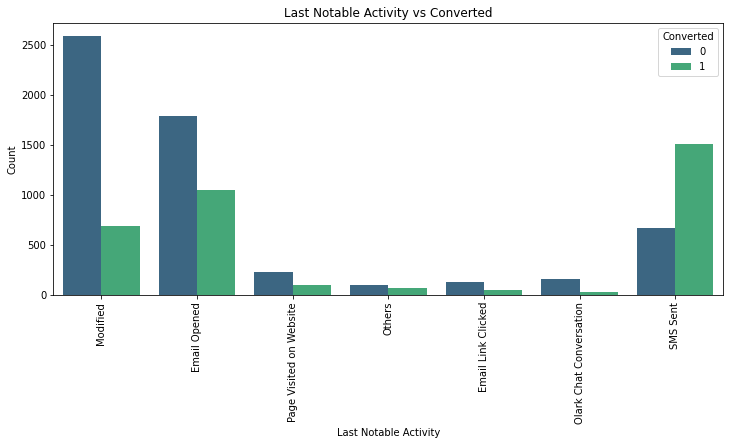

In [91]:
plt.figure(figsize=(12, 5))  
for col in categorical_columns:
    plt.figure(figsize=(12, 5))  
    sns.countplot(x=col, hue="Converted", data=lead_data, palette='viridis') 
    plt.xticks(rotation=90) 
    plt.title(f"{col} vs Converted")
    plt.xlabel(col) 
    plt.ylabel("Count") 
    plt.legend(title="Converted")
    plt.show()

Observations:
- Leads originating from the Lead Add Form have a higher conversion rate compared to those from API and Landing Page Submission.  
- The conversion rate is highest for leads from the Reference Source, while those from Google, Direct Traffic, and Olark Chat have relatively lower conversion rates.  
- SMS Sent has a higher conversion rate compared to Email Opened.  
- Customers with "Management" and "Other" specializations show a comparatively higher conversion rate.  
- Working professionals have a higher conversion rate than unemployed individuals, likely because they are more aware of current market demands and aim to upskill themselves accordingly.  

##### 4.3 Bivariate Analysis (Categorical vs Continuous)

<Figure size 864x360 with 0 Axes>

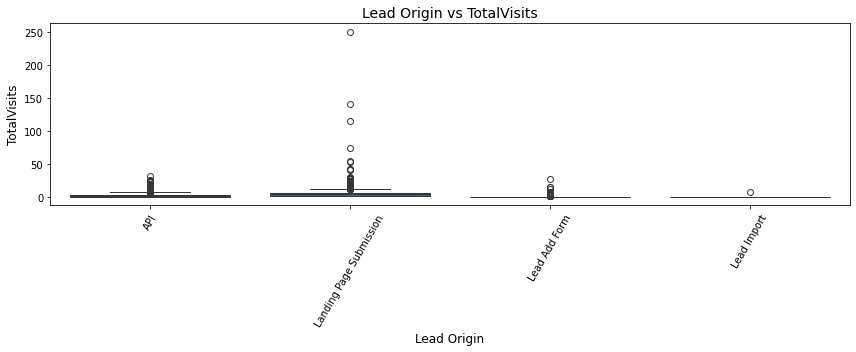

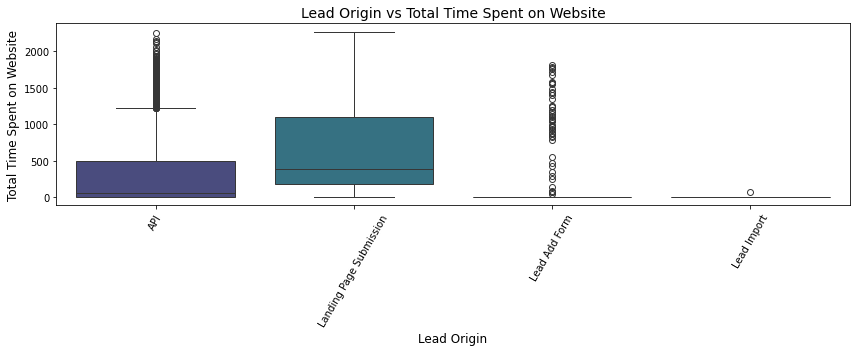

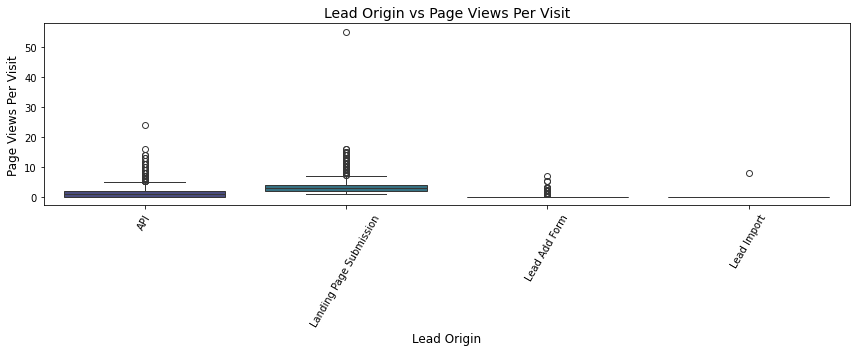

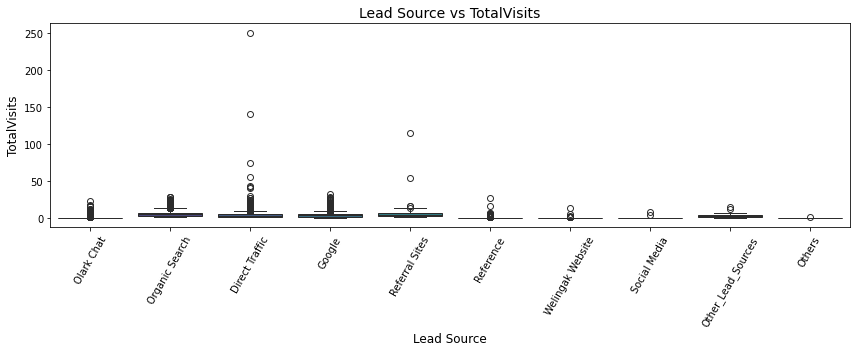

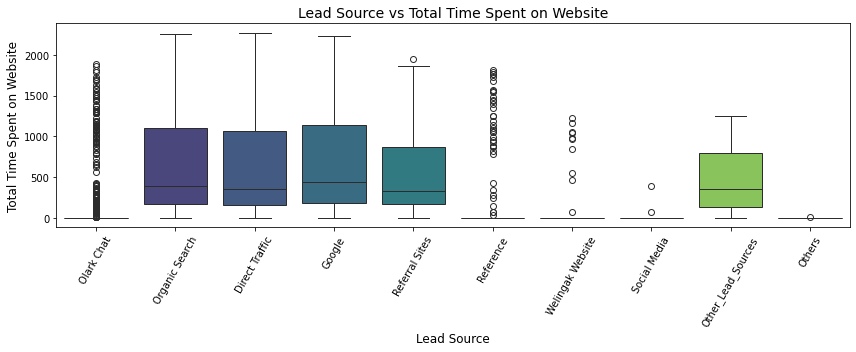

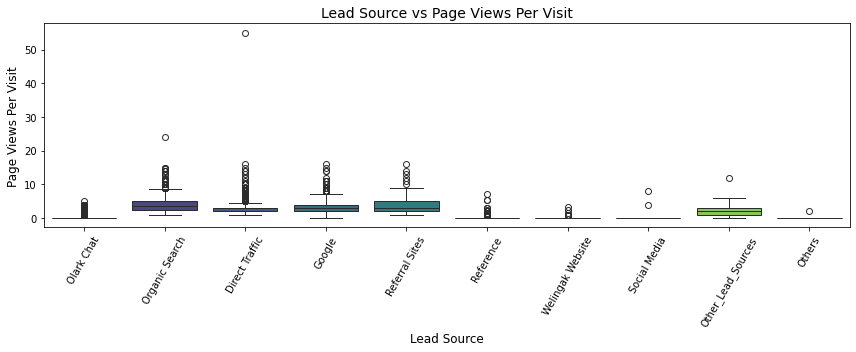

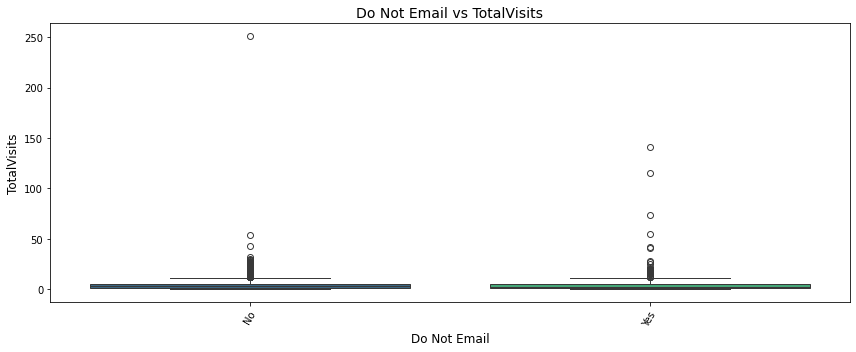

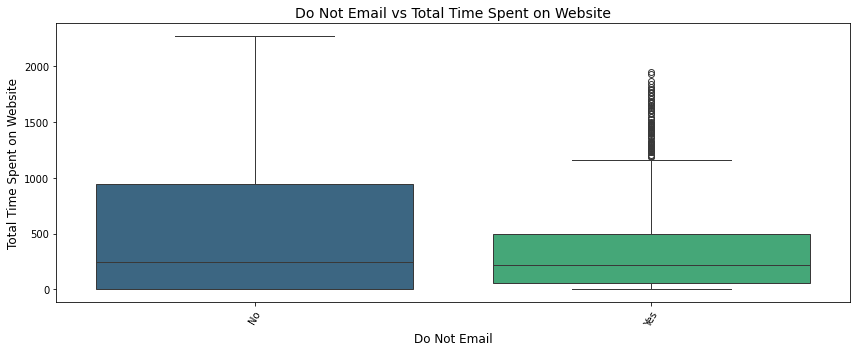

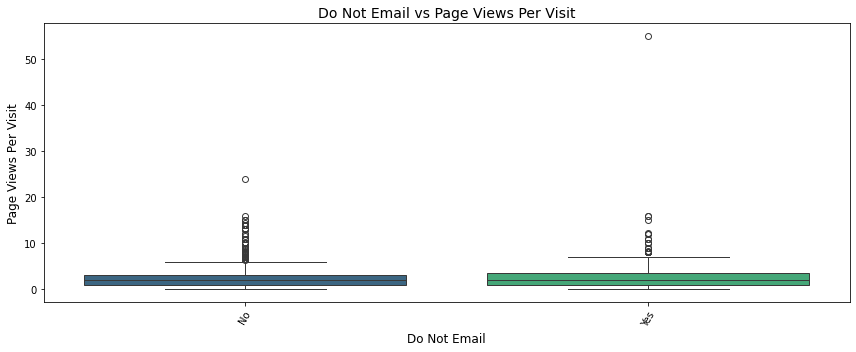

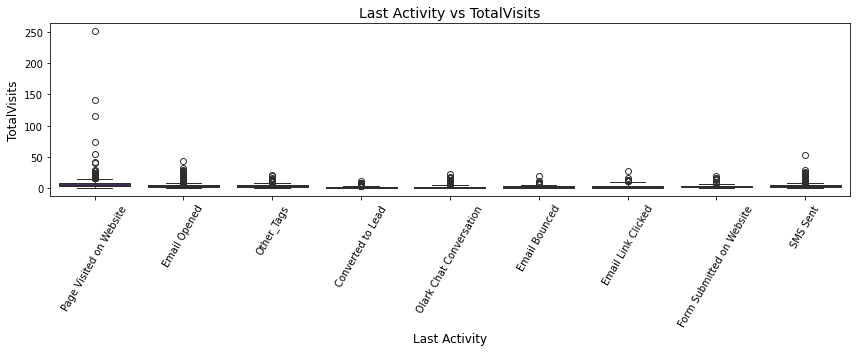

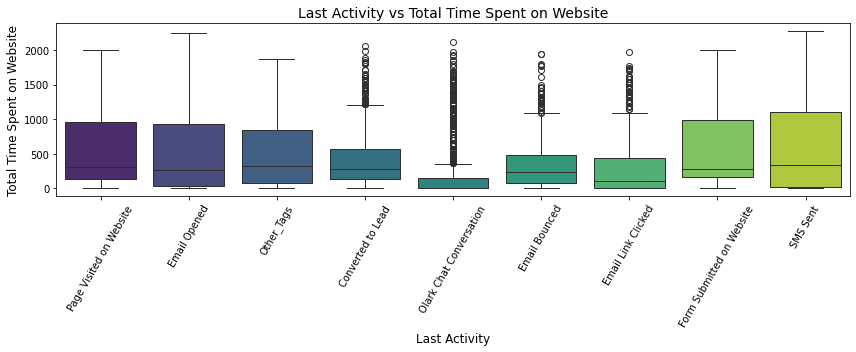

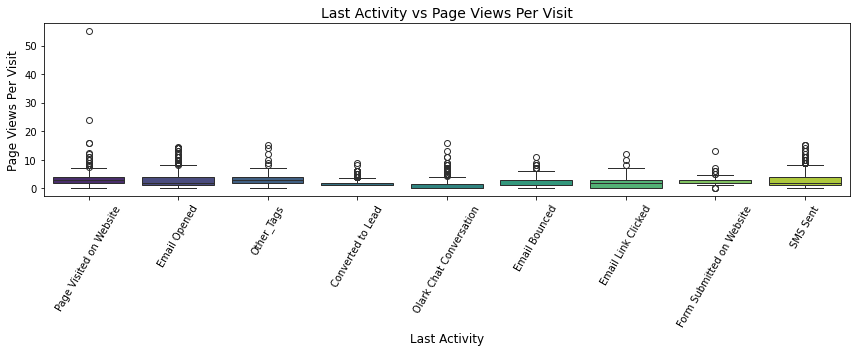

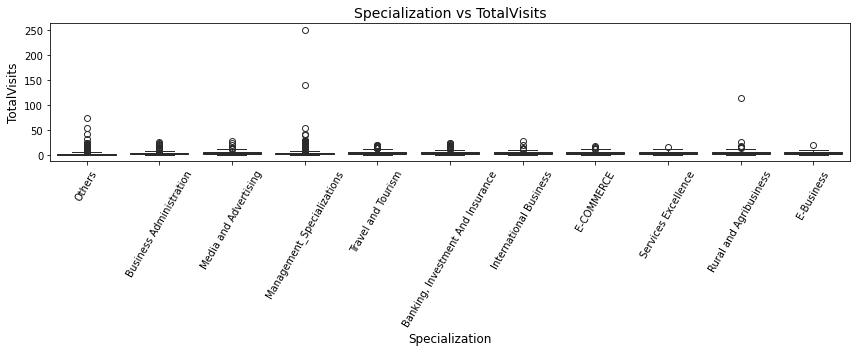

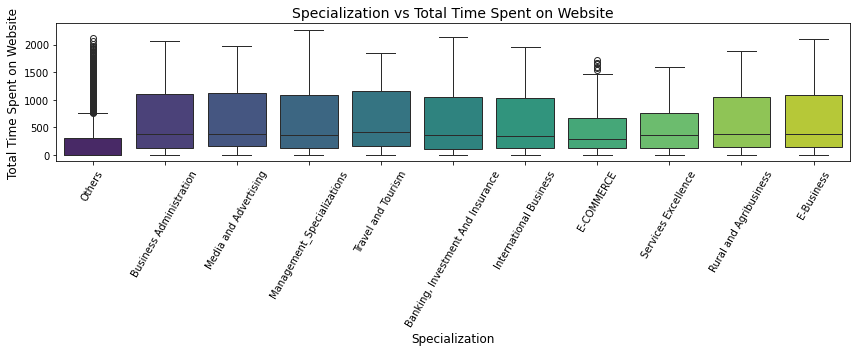

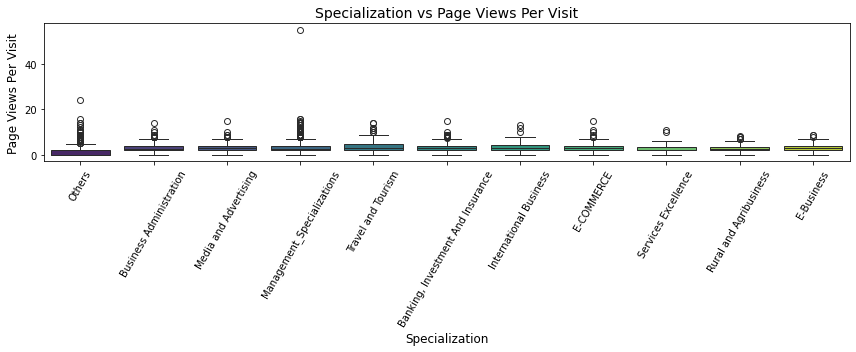

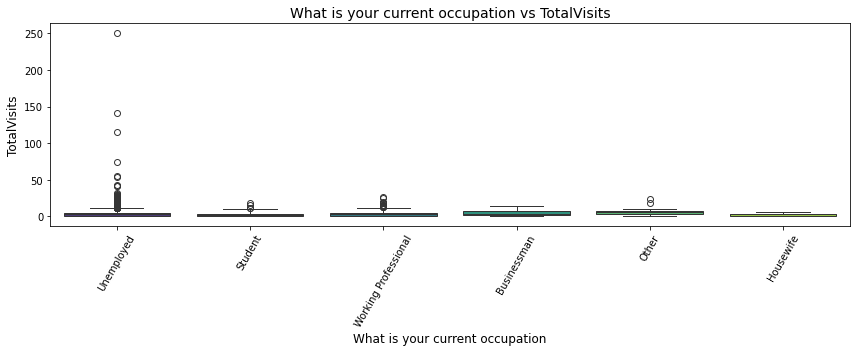

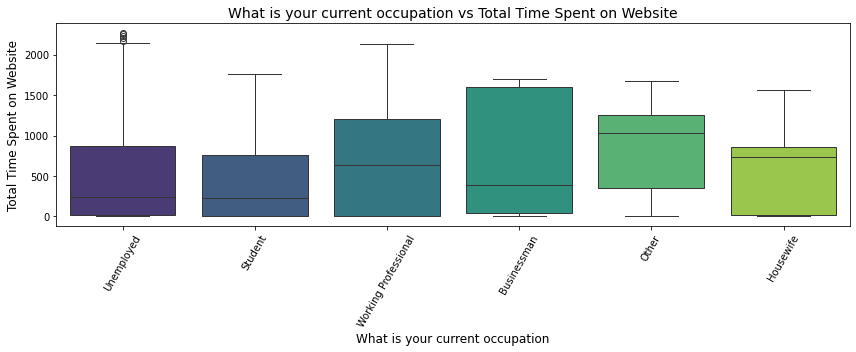

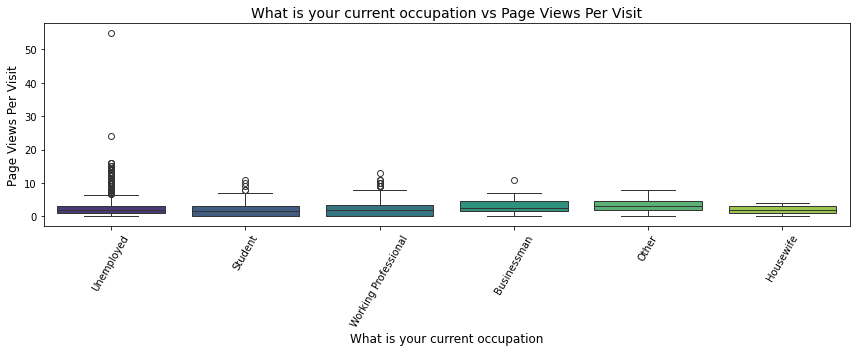

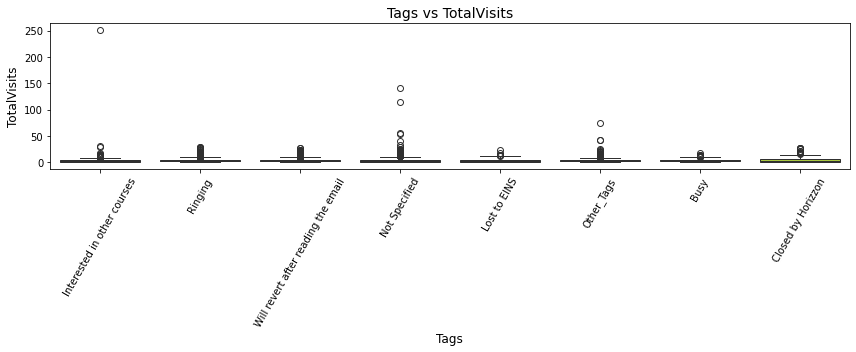

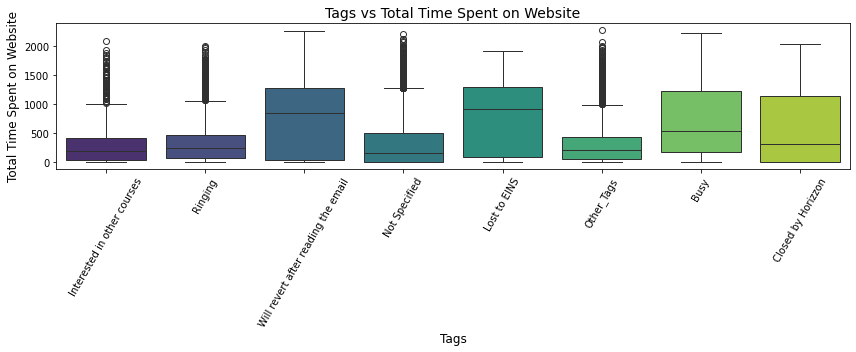

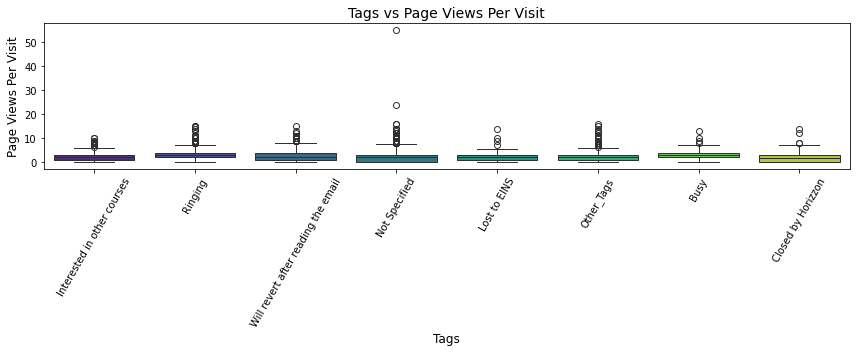

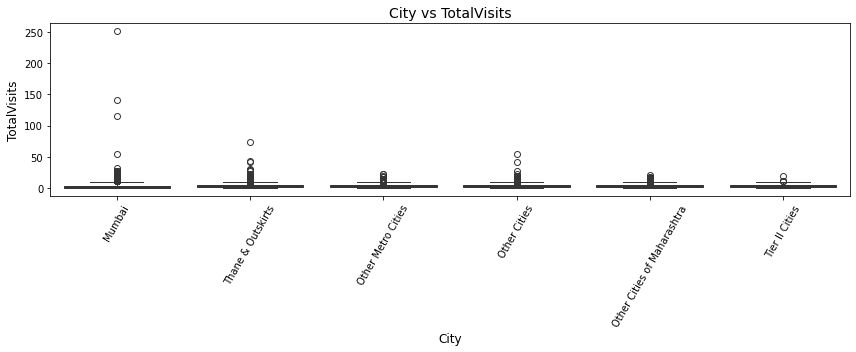

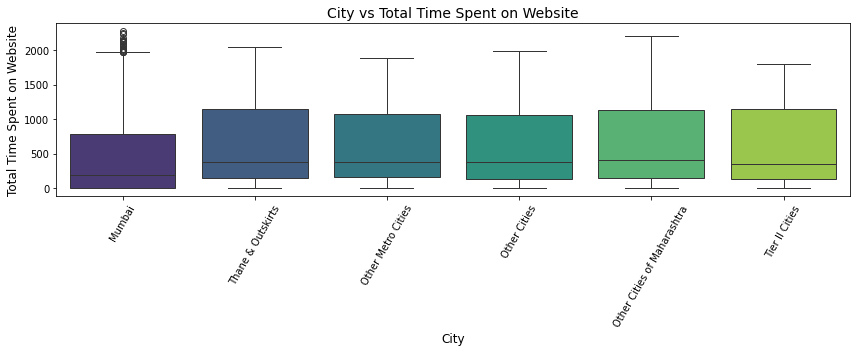

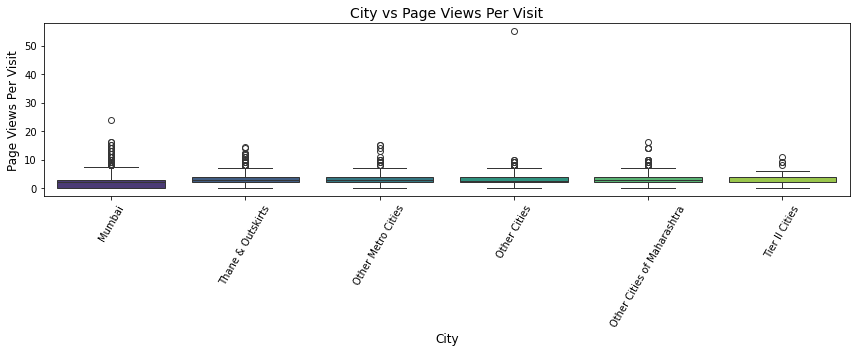

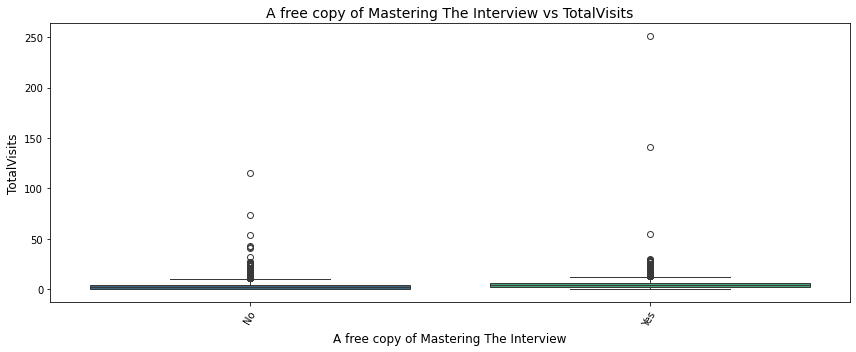

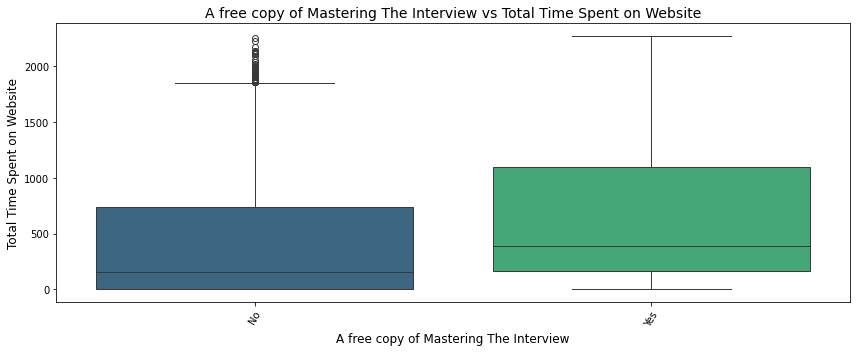

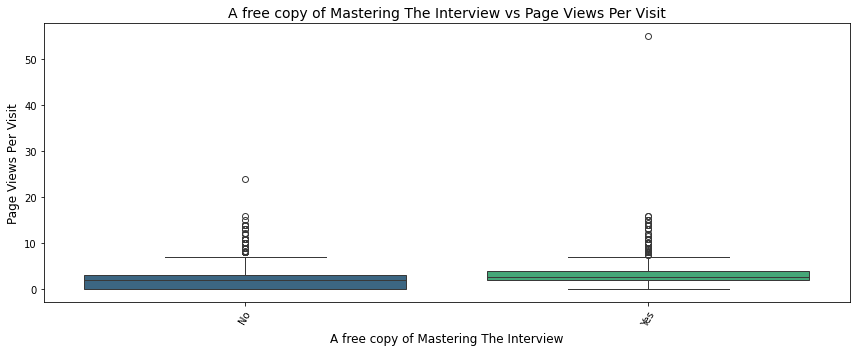

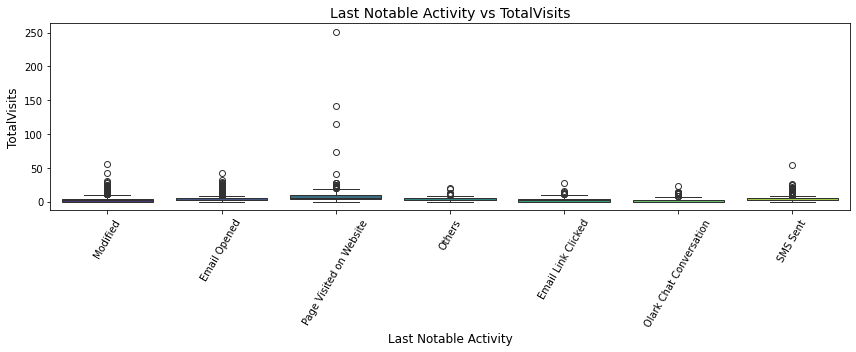

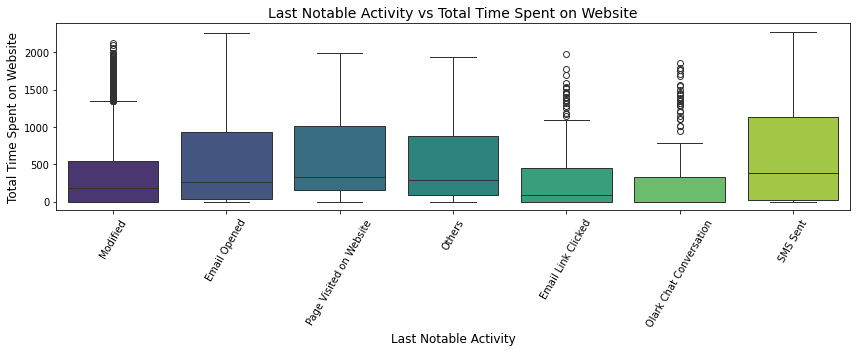

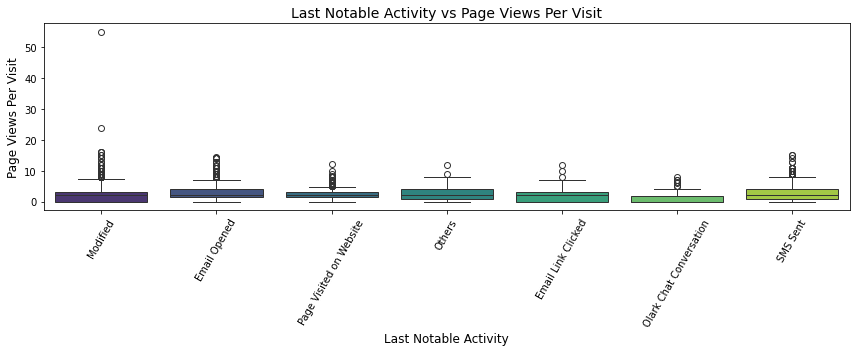

In [92]:
plt.figure(figsize=(12, 5)) 
for i in categorical_columns:
    for j in numerical_columns:
        plt.figure(figsize=(12, 5)) 
        sns.boxplot(x=lead_data[i], y=lead_data[j], palette="viridis")
        plt.xticks(rotation=60, fontsize=10) 
        plt.yticks(fontsize=10) 
        plt.title(f"{i} vs {j}", fontsize=14)
        plt.xlabel(i, fontsize=12) 
        plt.ylabel(j, fontsize=12) 
        plt.tight_layout()
        plt.show()

Observations:
- We can see that above boxplots highlight significant differences in numerical variables across various categorical variables that helps us in identifying which groups have higher engagement or activity levels.
- We can also see outliers which indicate unique cases or extreme behaviors within certain categories, which needs to be treated before modelling.

#### 4.4 Numerical Variable Analysis

##### 4.4.1 Analysing 'Converted' column

In [93]:
#checking the proportion of leads who were converted.

converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100

converted


38.02043282434362

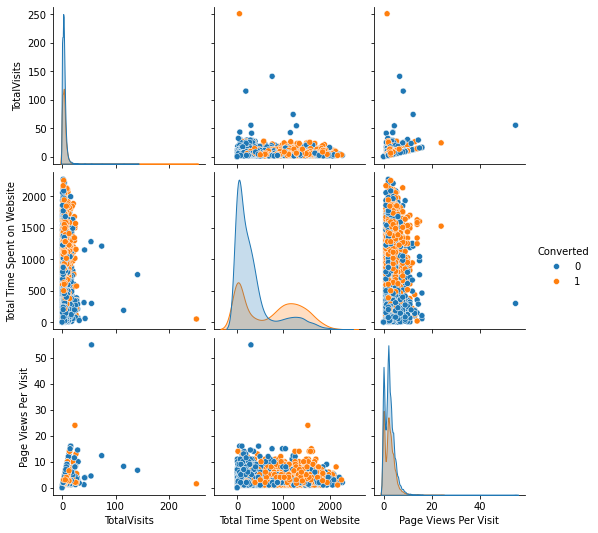

In [94]:
sns.pairplot(lead_data, hue='Converted')
plt.show()

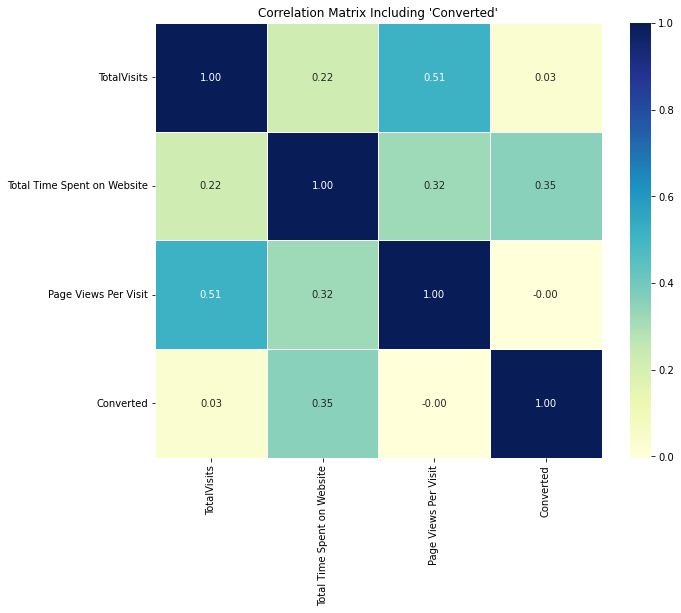

In [95]:
# Checking correlation among numerical variables
correlation_matrix = lead_data[numerical_columns + ['Converted']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Including 'Converted'")
plt.show()

Observations:
-  'Total Visits' and 'Page Views Per Visit' have the most correlation with each other.      

##### 4.4.2 Analysing 'Total Visits', 'Page Views Per Visit' and 'Total Time Spent on Website' columns.

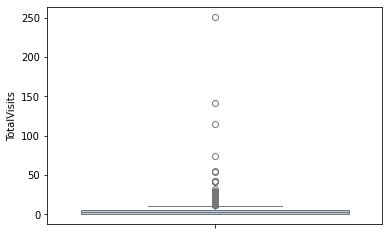

In [96]:
plt.figure(figsize=(6,4))
sns.boxplot(y=lead_data['TotalVisits'], palette = 'Paired')
plt.show()

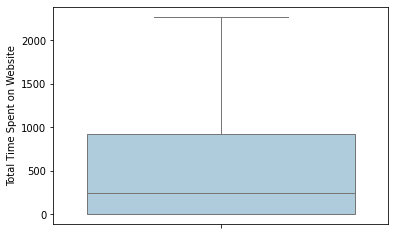

In [97]:
plt.figure(figsize=(6,4))
sns.boxplot(y=lead_data['Total Time Spent on Website'], palette = 'Paired')
plt.show()

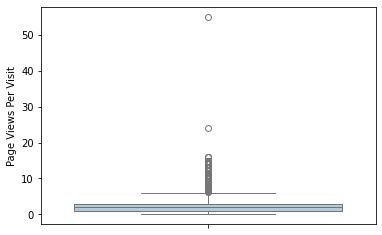

In [98]:
plt.figure(figsize=(6,4))
sns.boxplot(y=lead_data['Page Views Per Visit'], palette = 'Paired')
plt.show()

## Observations:
- We can see that there are no outliers from the boxplot of 'Total Time spent on Website'. 
- There outliers present in 'Total Visits' and 'Page Views Per Visit', which must be treated before modelling.
  

#### 4.5 Outlier Detection and Treatement

##### 4.5.1.Checking for "TotalVisits"

In [99]:
# Checking the Stats
lead_data["TotalVisits"].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

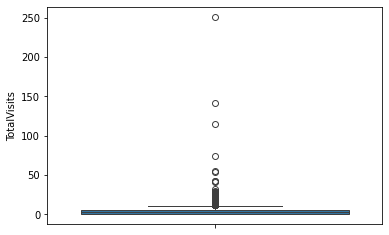

In [100]:
sns.boxplot(lead_data["TotalVisits"])
plt.show()

In [101]:
# Assigning the percentiles
lead_data['TotalVisits'].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

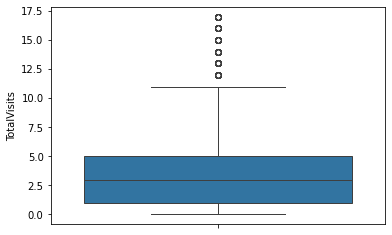

In [102]:
# Removing data point above 99 percentile and plotting the box plot
leads_data = lead_data[(lead_data['TotalVisits'] <= lead_data['TotalVisits'].quantile(0.99))]
sns.boxplot(y = leads_data['TotalVisits'])
plt.show()

##### 4.5.2 Checking for "Page Views Per Visit"

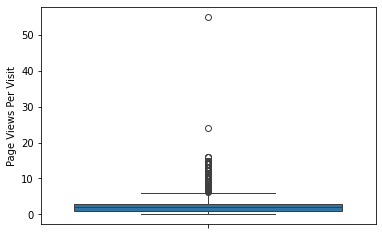

In [103]:
sns.boxplot(lead_data["Page Views Per Visit"])
plt.show()

In [104]:
# Assigning the percentiles
leads_data['Page Views Per Visit'].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

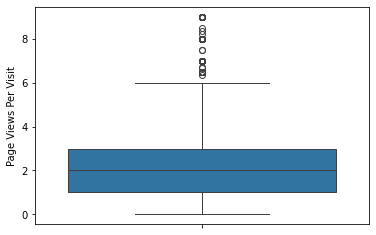

In [105]:
# Removing data point above 99 percentile and plotting the box plot
lead_data = lead_data[(lead_data['Page Views Per Visit'] <= lead_data['Page Views Per Visit'].quantile(0.99))]
sns.boxplot(y = lead_data['Page Views Per Visit'])
plt.show()

##### 4.5.3 Checking for "Total Time Spent on Website"

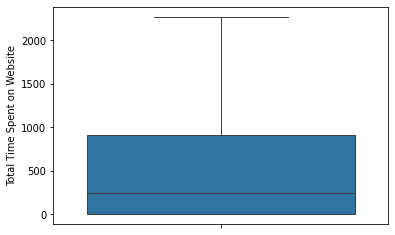

In [106]:
sns.boxplot(leads_data["Total Time Spent on Website"])
plt.show()

##### We can see there are no outliers on Total Time Spent on Website.

In [107]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Other_Tags,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [108]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9028 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9028 non-null   object 
 1   Lead Source                             9028 non-null   object 
 2   Do Not Email                            9028 non-null   object 
 3   Converted                               9028 non-null   int64  
 4   TotalVisits                             9028 non-null   float64
 5   Total Time Spent on Website             9028 non-null   int64  
 6   Page Views Per Visit                    9028 non-null   float64
 7   Last Activity                           9028 non-null   object 
 8   Specialization                          9028 non-null   object 
 9   What is your current occupation         9028 non-null   object 
 10  Tags                                    9028 non-null   object 
 

##### **Converting some binary variables (Yes/No) to 0/1**

In [109]:
# Applying the function to the customer list
var_mapping = ['Do Not Email', 'A free copy of Mastering The Interview']

#defining the mapping function

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

#applying the mapping function to list of variables
lead_data[var_mapping] = lead_data[var_mapping].apply(binary_map)

In [110]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other_Tags,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [111]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9028 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9028 non-null   object 
 1   Lead Source                             9028 non-null   object 
 2   Do Not Email                            9028 non-null   int64  
 3   Converted                               9028 non-null   int64  
 4   TotalVisits                             9028 non-null   float64
 5   Total Time Spent on Website             9028 non-null   int64  
 6   Page Views Per Visit                    9028 non-null   float64
 7   Last Activity                           9028 non-null   object 
 8   Specialization                          9028 non-null   object 
 9   What is your current occupation         9028 non-null   object 
 10  Tags                                    9028 non-null   object 
 

### 5. Creating Dummy Variables for the Categorical Variables

In [112]:
# Creating a dummy variable for the categorical variables
dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                                  'Tags','City','Last Notable Activity']], drop_first=True).astype('uint8')
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Sources,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Tags,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [113]:
lead_data = pd.concat([lead_data, dummy], axis=1)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Sources,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Tags,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other_Tags,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [114]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'Tags','City','Last Notable Activity'], axis=1)
lead_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Sources,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Tags,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [115]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9028 entries, 0 to 9239
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9028 non-null   int64  
 1   Converted                                             9028 non-null   int64  
 2   TotalVisits                                           9028 non-null   float64
 3   Total Time Spent on Website                           9028 non-null   int64  
 4   Page Views Per Visit                                  9028 non-null   float64
 5   A free copy of Mastering The Interview                9028 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9028 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9028 non-null   uint8  
 8   Lead Origin_Lead Import                               9028 non-

### 6. Model Building Using Logistic Regression

#### 6.1 Splitting the Dataset

In [116]:
# Putting the feature variable to X
X = lead_data.drop(['Converted'],axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Sources,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Tags,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [117]:
# Putting the target variable to y
y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
print(X.shape,X_train.shape,X_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(9028, 58) (6319, 58) (2709, 58)
(9028,) (6319,) (2709,)


#### 6.2 Feature Scaling

In [119]:
# Applying scaler to all numeric variables
scaler = StandardScaler()
# Fitting and training the dataset to rescale the numeric variables
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Sources,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Tags,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5736,0,1.954740,0.849325,0.522407,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9064,0,0.135088,1.354558,-0.492219,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7757,0,0.741639,-0.824952,0.036232,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9119,0,-0.269280,0.526639,-0.138157,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2433,0,-0.673647,-0.876582,-1.195058,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [120]:
# Checking the Coversion Rate
conversion = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
conversion

37.971175166297115

#### 6.3 Model Building using Statsmodels and RFE

In [121]:
# Importing the statsmodel package
import statsmodels.api as sm

In [122]:
# Initializing the logistic regression function
logreg = LogisticRegression()

# Importing RFE
from sklearn.feature_selection import RFE
# Running RFE with 15 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [123]:
# Checking the Rank of the varaibles with the help of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('A free copy of Mastering The Interview', False, 22),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 11),
 ('Lead Source_Google', False, 43),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 44),
 ('Lead Source_Other_Lead_Sources', False, 41),
 ('Lead Source_Others', False, 13),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', False, 12),
 ('Lead Source_Social Media', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 38),
 ('Last Activity_Email Link Clicked', False, 39),
 ('Last Activity_Email Opened', False, 10),
 ('Last Activity_Form Submitted on Website', False, 16),
 ('Last Activity_Olark Chat Conversation', False, 4),
 ('Last Activity_Other_Tags', False, 9),
 ('Last Act

In [124]:
# Checking the columns which are not supported
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Other_Lead_Sources', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Tags',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising', 'Specialization_Others',
       'Specialization_Rural and Agribusiness',
       '

In [125]:
# Extracting and assigning the chosen columns by RFE to a variable.
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### I. Building the Model 1

In [126]:
# Creating a dataframe consisting of all the predictor variables along with their VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_SMS Sent,6.13
5,Last Activity_SMS Sent,5.92
12,Last Notable Activity_Modified,1.94
2,Lead Origin_Lead Add Form,1.83
11,Tags_Will revert after reading the email,1.60
3,Lead Source_Olark Chat,1.47
1,Total Time Spent on Website,1.45
4,Lead Source_Welingak Website,1.35
6,Tags_Closed by Horizzon,1.21
9,Tags_Other_Tags,1.18


##### Create the first fitted model using Statsmodels

In [127]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[rfe_col])

#creating the first fitted model

log_mod_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = log_mod_1.fit()

# Reading the summary of the model

print(res1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6319
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1233.3
Date:                Fri, 17 Jan 2025   Deviance:                       2466.5
Time:                        20:49:49   Pearson chi2:                 7.89e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6078
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

##### Since VIF of 'Last Notable Activity_SMS Sent' column is greater than 5, it suggests multicollinearity. So we can drop this column.

In [128]:
# Dropping 'Lead Source_Google' column
rfe_col = rfe_col.drop('Last Notable Activity_SMS Sent', 1)

#### II. Building the Model 2

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe consisting Aof all the predictor variables along with their VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.83
11,Tags_Will revert after reading the email,1.55
12,Last Notable Activity_Modified,1.55
5,Last Activity_SMS Sent,1.47
1,Total Time Spent on Website,1.45
3,Lead Source_Olark Chat,1.43
4,Lead Source_Welingak Website,1.35
6,Tags_Closed by Horizzon,1.21
9,Tags_Other_Tags,1.16
7,Tags_Interested in other courses,1.12


In [130]:
import statsmodels.api as sm

# Adding a constant

X_train_sm = sm.add_constant(X_train[rfe_col])

# Creating the second fitted model

log_mod_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = log_mod_2.fit()

# Reading the summary of the model

print(res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6319
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1238.7
Date:                Fri, 17 Jan 2025   Deviance:                       2477.4
Time:                        20:49:49   Pearson chi2:                 7.83e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6071
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

##### We can go ahead this model as p-values of all the columns are less than 0.05 and VIF values are less than 5.

 #### 6.4 Deriving Probabilities, Predictions and Lead Score on Train Data

In [131]:
# Getting Predicted values on train set
y_train_pred = res2.predict(X_train_sm)
y_train_pred[:10]

5736    0.330702
9064    0.995435
7757    0.007923
9119    0.050735
2433    0.051145
1832    0.010274
1157    0.981992
265     0.043683
1526    0.003065
2037    0.004470
dtype: float64

In [132]:
# Creating a dataframe which has y_train dataset values and corresponding y_train predicted values as learnt by X_train
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead_Num_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead_Num_ID
5736,0,0.330702,5736
9064,1,0.995435,9064
7757,0,0.007923,7757
9119,0,0.050735,9119
2433,0,0.051145,2433


##### Taking 0.5 as cut-off value for deciding whether a lead will be converted or not

In [133]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead_Num_ID,Predicted
5736,0,0.330702,5736,0
9064,1,0.995435,9064,1
7757,0,0.007923,7757,0
9119,0,0.050735,9119,0
2433,0,0.051145,2433,0


#### 6.5 Confusion Matrix

In [134]:
#import metrics function 
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3762  167]
 [ 304 2086]]


In [135]:
# Checking the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9254628896977369


In [136]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [137]:
#sensitivity
TP / float(TP+FN)

0.8728033472803347

In [138]:
#specificity
TN / float(TN+FP)

0.9574955459404428

In [139]:
# False Postive Rate - predicting conversion when lead does not have convert
print(FP/ float(TN+FP))

0.04250445405955714


In [140]:
#vPositive predictive value 
print (TP / float(TP+FP))

0.9258766089658234


In [141]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9252336448598131


#### 6.6 Plotting the ROC Curve

In [142]:
# Creating a function for plotting a ROC curve.
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [143]:
# Plotting ROC curve for converted and converted probability columns
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

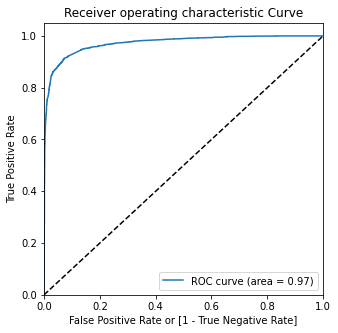

In [144]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### 6.7 Optimal Cut-Off

In [145]:
# Creating columns with different probability cutoffs 
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead_Num_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5736,0,0.330702,5736,0,1,1,1,1,0,0,0,0,0,0
9064,1,0.995435,9064,1,1,1,1,1,1,1,1,1,1,1
7757,0,0.007923,7757,0,1,0,0,0,0,0,0,0,0,0
9119,0,0.050735,9119,0,1,0,0,0,0,0,0,0,0,0
2433,0,0.051145,2433,0,1,0,0,0,0,0,0,0,0,0


In [146]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cut_off_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total_1=sum(sum(cm_1))
    accuracy = (cm_1[0,0]+cm_1[1,1])/total_1
    
    speci = cm_1[0,0]/(cm_1[0,0]+cm_1[0,1])
    sensi = cm_1[1,1]/(cm_1[1,0]+cm_1[1,1])
    cut_off_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cut_off_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378224  1.000000  0.000000
0.1   0.1  0.835734  0.969874  0.754136
0.2   0.2  0.895870  0.948954  0.863579
0.3   0.3  0.921981  0.910879  0.928735
0.4   0.4  0.923722  0.892887  0.942479
0.5   0.5  0.925463  0.872803  0.957496
0.6   0.6  0.926729  0.853975  0.970985
0.7   0.7  0.914069  0.804184  0.980911
0.8   0.8  0.905523  0.776151  0.984220
0.9   0.9  0.888906  0.720502  0.991346


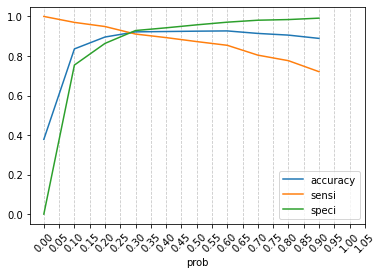

In [147]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cut_off_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
custom_ticks = np.arange(0, 1.1, 0.05) 
plt.xticks(custom_ticks, rotation=45, fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [148]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.27 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead_Num_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
5736,0,0.330702,5736,0,1,1,1,1,0,0,0,0,0,0,1
9064,1,0.995435,9064,1,1,1,1,1,1,1,1,1,1,1,1
7757,0,0.007923,7757,0,1,0,0,0,0,0,0,0,0,0,0
9119,0,0.050735,9119,0,1,0,0,0,0,0,0,0,0,0,0
2433,0,0.051145,2433,0,1,0,0,0,0,0,0,0,0,0,0


In [149]:
# Calculating the lead score for each lead and displaying the first 5 records
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Lead_Num_ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Lead_Num_ID,final_Predicted,Lead_Score
5736,0,0.330702,5736,1,33
9064,1,0.995435,9064,1,100
7757,0,0.007923,7757,0,1
9119,0,0.050735,9119,0,5
2433,0,0.051145,2433,0,5


In [150]:
# Calculating the overall accuracy using optimal cut-off
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
accuracy

0.9197657857255895

In [151]:
# Creating confusion matrix for new cut-off 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3621,  308],
       [ 199, 2191]], dtype=int64)

In [152]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [153]:
# Sensitivity
sensitivity = TP / float(TP+FN)
sensitivity

0.9167364016736401

In [154]:
# Specificity
specificity = TN / float(TN+FP)
specificity

0.9216085517943498

In [155]:
# False Postive Rate - predicting conversion customer does not convert
print(FP/ float(TN+FP))

0.07839144820565029


In [156]:
# Positive predictive value 
print (TP / float(TP+FP))

0.876750700280112


In [157]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9479057591623037


In [158]:
# Precision
TP / TP + FP

309.0

In [159]:
# Recall
TP / TP + FN

200.0

In [160]:
# Importing Precision and Recall Score
from sklearn.metrics import precision_score, recall_score

In [161]:
# Precision
precision = precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)
precision

0.876750700280112

In [162]:
# Recall
recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
recall

0.9167364016736401

#### Final Analysis on Training Dataset

In [163]:
print('Final Analysis On Training Dataset')
print('******************************')
print(TN,' ',FP)
print(FN,' ',TP)
print('******************************')
print('Accuracy -->', round(accuracy*100,2))
print('Specificity -->',round(specificity*100,2))
print('Precision -->',round(precision*100,2))
print('Recall -->',round(recall*100,2))

Final Analysis On Training Dataset
******************************
3621   308
199   2191
******************************
Accuracy --> 91.98
Specificity --> 92.16
Precision --> 87.68
Recall --> 91.67


In [164]:
from sklearn.metrics import precision_recall_curve

In [165]:
# Plotting recall and precision curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

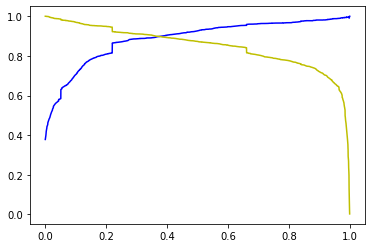

In [166]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "y-")
plt.show()

### 7. Predictions on Test Dataset

#### 7.1 Feature Scaling

In [167]:
# Scaling the test dataset values
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Displaying the dataframe with scaled data
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Sources,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Tags,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
4696,0,-0.067096,-0.033912,0.390294,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5424,0,0.135088,0.386501,0.918745,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1629,0,-0.673647,-0.876582,-1.195058,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2148,0,-0.673647,-0.876582,-1.195058,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9182,0,-0.673647,-0.876582,-1.195058,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [168]:
# Choosing the columns in test dataset which were chosen by RFE for building our model
X_test = X_test[rfe_col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4696,0,-0.033912,0,0,0,1,0,0,0,0,1,0,0,0
5424,0,0.386501,0,0,0,0,0,0,0,1,0,0,1,0
1629,0,-0.876582,0,1,0,1,0,0,0,0,1,0,1,0
2148,0,-0.876582,0,1,0,0,0,0,0,0,0,0,1,0
9182,0,-0.876582,0,1,0,1,0,0,0,1,0,0,1,0


#### 7.2 Predictions on Test Data

In [169]:
# Adding a constant 
X_test_sm = sm.add_constant(X_test)

In [170]:
#predicting the values in test dataset based on model built on training dataset
y_test_pred = res2.predict(X_test_sm)

In [171]:
y_test_pred[:10]

4696    0.037561
5424    0.005546
1629    0.010830
2148    0.051145
9182    0.034870
1081    0.002945
554     0.940498
459     0.970572
3764    0.037804
4285    0.399104
dtype: float64

In [172]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [173]:
y_pred_1.head()

,0
4696,0.037561
5424,0.005546
1629,0.010830
2148,0.051145
9182,0.034870


In [174]:
#converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [175]:
#creating a new column 'Lead_Num_ID' using the index values
y_test_df['Lead_Num_ID'] = y_test_df.index

In [176]:
# Removing index from both datasets to append them by column
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [177]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [178]:
# Checking the dataframe head
y_pred_final.head()

,Converted,Lead_Num_ID,0
0,0,4696,0.037561
1,0,5424,0.005546
2,0,1629,0.010830
3,0,2148,0.051145
4,0,9182,0.034870


In [179]:
#renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Lead_Num_ID,Converted_prob
0,0,4696,0.037561
1,0,5424,0.005546
2,0,1629,0.010830
3,0,2148,0.051145
4,0,9182,0.034870


In [180]:
# Assigning probabability score based on cutoff of 0.27

y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.27 else 0)

In [181]:
y_pred_final.head()

,Converted,Lead_Num_ID,Converted_prob,final_Predicted
0,0,4696,0.037561,0
1,0,5424,0.005546,0
2,0,1629,0.010830,0
3,0,2148,0.051145,0
4,0,9182,0.034870,0


In [182]:
#checking the overall accuracy
accuracy = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)
accuracy

0.9265411590992987

#### 7.3 Confusion Matrix

In [183]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1546,  125],
       [  74,  964]], dtype=int64)

In [184]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [185]:
#Sensitivity
sensitivity = TP / float(TP+FN)
sensitivity

0.928709055876686

In [186]:
#Specificity
specificity = TN / float(TN+FP)
specificity

0.9251944943147815

In [187]:
#Precision
precision = precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)
precision

0.8852157943067034

In [188]:
#Recall
recall = recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)
recall

0.928709055876686

#### Final Analysis Results on Test Dataset

In [189]:
print('Final Analysis On Test Dataset')
print('******************************')
print(TN,' ',FP)
print(FN,' ',TP)
print('******************************')
print('Accuracy -->', round(accuracy*100,2))
print('Specificity -->',round(specificity*100,2))
print('Precision -->',round(precision*100,2))
print('Recall -->',round(recall*100,2))

Final Analysis On Test Dataset
******************************
1546   125
74   964
******************************
Accuracy --> 92.65
Specificity --> 92.52
Precision --> 88.52
Recall --> 92.87


### 8. Assigning Lead Score with respect to Lead_Num_ID

In [190]:
# Making new df with lead score
lead_scores_df = pd.DataFrame()
df1 = y_train_pred_final[['Lead_Num_ID','Converted_prob']]
df2 = y_pred_final[['Lead_Num_ID','Converted_prob']]

In [191]:
# Appending the index
lead_scores_df = pd.concat([df1, df2], ignore_index=True)

In [192]:
# Checking the first 5 records
lead_scores_df.head()

,Lead_Num_ID,Converted_prob
0,5736,0.330702
1,9064,0.995435
2,7757,0.007923
3,9119,0.050735
4,2433,0.051145


In [193]:
# Assigning the value to the Lead Score by Multiplying with 100
lead_scores_df['Lead Score']=lead_scores_df['Converted_prob'].apply(lambda x: round((x*100)))

In [194]:
# dropping Converted_Prob as we have got Lead Scores we wanted
lead_scores_df.drop(columns=['Converted_prob'],axis=1,inplace=True)

In [195]:
# Checking top 10 values
lead_scores_df.head(10)

,Lead_Num_ID,Lead Score
0,5736,33
1,9064,100
2,7757,1
3,9119,5
4,2433,5
5,1832,1
6,1157,98
7,265,4
8,1526,0
9,2037,0


### 9. Finding out the Hot Leads which should be contacted

In [196]:
# Taking into account,the customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85 ('Hot Leads').
hot_leads=lead_scores_df.loc[lead_scores_df["Lead Score"]>=85]
hot_leads

,Lead_Num_ID,Lead Score
1,9064,100
6,1157,98
21,5390,100
23,5824,98
30,110,98
...,...,...
9018,3810,99
9019,3441,96
9020,4645,92
9023,7455,87


In [197]:
# Finding out the Important Features from final model
res2.params.sort_values(ascending=False)

Tags_Closed by Horizzon                          7.204061
Tags_Lost to EINS                                5.711259
Tags_Will revert after reading the email         4.575609
Lead Source_Welingak Website                     4.081473
Lead Origin_Lead Add Form                        2.146431
Last Activity_SMS Sent                           1.934491
Lead Source_Olark Chat                           1.284689
Total Time Spent on Website                      1.069427
Do Not Email                                    -0.804841
const                                           -1.613302
Last Notable Activity_Modified                  -1.654530
Last Notable Activity_Olark Chat Conversation   -1.820065
Tags_Interested in other courses                -1.878975
Tags_Other_Tags                                 -2.334552
Tags_Ringing                                    -3.528422
dtype: float64

### 10. Conclusions

* According to final model, the variables that are important for verfying the Hot Leads are:
    *  Tags_Closed by Horizzon
    *  Tags_Lost to EINS
    *  Tags_Will revert after reading the email
    *  Lead Source_Welingak Website
    *  Lead Origin_Lead Add Form
    *  Last Activity_SMS Sent
    *  Lead Source_Olark Chat
    *  Total Time Spent on Website

### Comparision of the evaluation metric results obtained on Train and Test Dataset:
- Train Dataset
    - Accuracy --> 91.98
    - Specificity --> 92.16
    - Precision --> 87.68
    - Recall --> 91.67
     
- Test Dataset
    - Accuracy --> 92.65
    - Specificity --> 92.52
    - Precision --> 88.52
    - Recall --> 92.87